# Day 1

## Problem 1

In [78]:
# import libraries etc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
#from ipywidgets import interact

from scipy.optimize import newton
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Matplotlib magic
%matplotlib inline

In [64]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    #this is a function to create a new colormap
    new_cmap = mplc.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmapT = plt.get_cmap('seismic')
new_cmap = truncate_colormap(cmapT, 0.5, 1)

In [65]:
#plot the contourf plots
def plotcontourf(X,Y,Z,minV=0,maxV=90,colormap=plt.get_cmap('jet'),title='simulation',
                 varlabel='$^{\circ}$',Xname='longitude',Yname='latitude'):
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1,1,1)
    norm = mplc.Normalize(minV,maxV)
    A=(maxV-minV)/40
    contours=plt.contourf(X, Y, Z, np.arange(minV, maxV, A), cmap=colormap,norm=norm,extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cbar=plt.colorbar(contours,cmap=colormap,cax=cax)
    cbar.ax.set_title(varlabel, color='k',weight='bold',fontsize=20, horizontalalignment= 'left')
    ax.set_ylabel(Yname)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
    ax.plot([0,40],[274,274], lw=5, c="k") #snowball state
    icefreeT=[274+d for d in X] #for ice free
    ax.plot(X,icefreeT,lw=5,c='k')
    ax.text(5, 265, 'Ice covered surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.text(5, 300, 'Ice free surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.text(15, 285, 'Partly ice-covered surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.set_xlabel(Xname)
    ax.set_title(title,fontweight='bold',fontsize=20)
    plt.show()

A common approximation for the variation of temperature with latitude is 

$T(\phi) = T_e - \Delta_T\sin{(\phi)}^2$

Where $T(\phi)$ is the temperature at latitude $\phi$, $T_e$ is the temperature at the equator, $\Delta_T$ is the
equator-pole temperature gradient.

In [66]:
# here I define the temperature profile with different exponents
#inputs to the functions are Te, deltaT and latitudes

def get_temp_profile(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**2

def get_temp_profile_4(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**4

def get_temp_profile_6(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient* np.sin(latitudes)**6

def get_temp_profile_8(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**8

def get_weighted_average(quantity, latitudes):
    
    return np.average(quantity, weights=np.cos(latitudes))

Let's start by calculating the average planetary temperature (T$_p$) for the temperature range of equator temperature (T$_e$) and different $\Delta$T 's. For plotting the lines for separation of the different states, we plot the lines as following:

$ T_e \leq 274K $

for the snowball state, then the delta T can be whatever. For the ice free state, we define our $T_e$ as following:

$ T_e > 274K + \Delta T $

By doing this, the difference between the $T_e$ and $\Delta T $ is always greater than the limit for SB state (274K). These lines are plotted on the plots as computed in the plotcontourf-function.

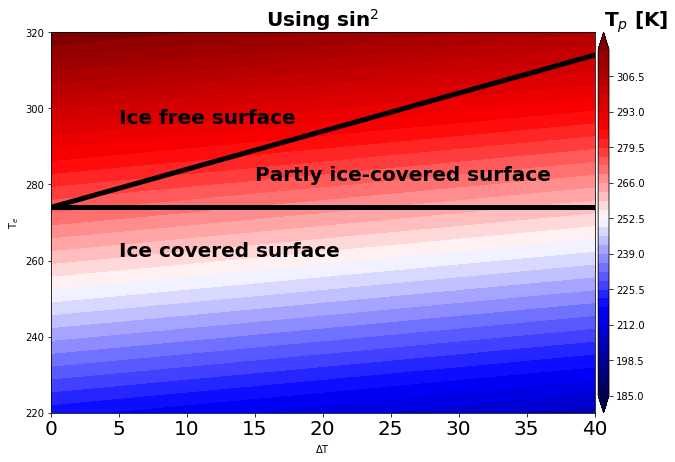

In [79]:
Te = np.arange(220,321,1) #create Te
deltaT=np.arange(0,41,1) #create deltaT
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #latitudes in radians
TP=[] #creating an empty array for saving the Tp's for each deltaT used
for T in Te:
    Tprofrad=[get_temp_profile(T,t,latsnew) for t in deltaT]
    Tavrad=[get_weighted_average(tt,latsnew) for tt in Tprofrad] #for the planetary average
    TP.append(Tavrad) #shape of (len(deltaT),len(Te))

    #and now lets plot it
plotcontourf(deltaT,Te,TP,minV=185,maxV=320,title='Using sin$^2$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))


## Problem 2

Here we are supposed to change the exponent for the canlculation of your $T_p$ and see if that has any implications. Recall the equaiton above:

$T(\phi) = T_e - \Delta_T\sin{(\phi)}^2$

This would implicate, with higher exponents (exp) the value of $\sin{(\phi)}^{exp}$ will be smaller, thereby $\Delta_T\sin{(\phi)}^{exp}$ is smaller, resulting that the $T_p$ is larger for larger exponents, larger impact for higher $\Delta_T$'s. Lets see if this is correct. I also plot the difference between the "original" with 2 as exponent with the new one to better highlight the differences, if there are any. 

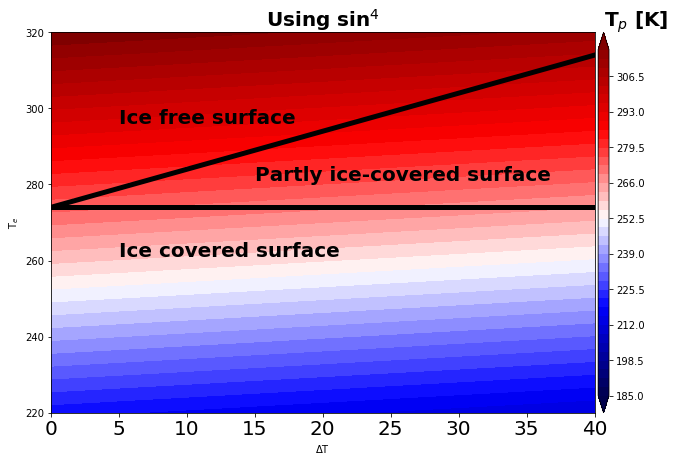

In [80]:
#exponent = 4
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_4=[]
for T in Te:
    Tprofrad_4=[get_temp_profile_4(T,t,latsnew) for t in deltaT]
    Tavrad_4=[get_weighted_average(tt,latsnew) for tt in Tprofrad_4] #planetary average
    TP_4.append(Tavrad_4)

plotcontourf(deltaT,Te,TP_4,minV=185,maxV=320,title='Using sin$^4$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 5.33


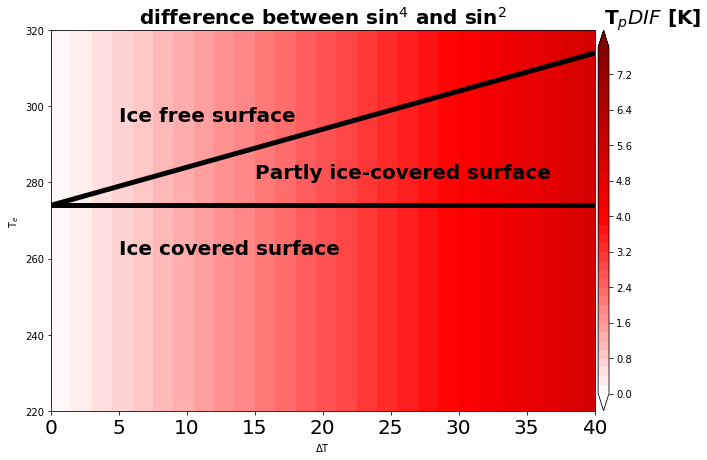

In [81]:
#calculate the difference between exp 4 and exp 2
Dif4 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif4[i][j] = TP_4[i][j] - TP[i][j]

print('min: ' + str(round(Dif4.min(),2)) +
      ', max: ' + str(round(Dif4.max(),2)) )

plotcontourf(deltaT,Te,Dif4,minV=0,maxV=8,title='difference between sin$^4$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

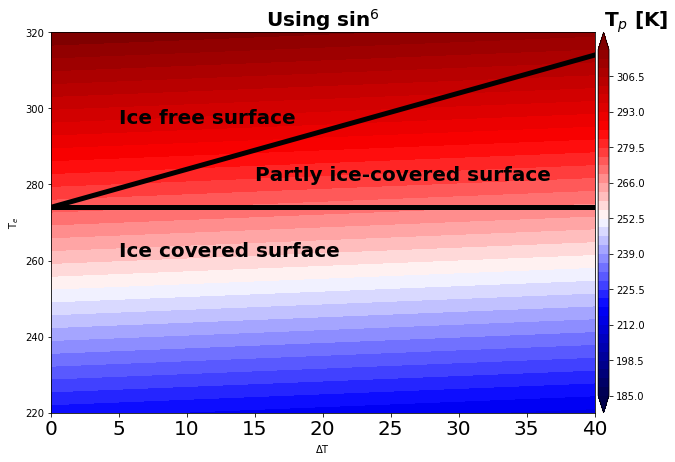

In [82]:
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_6=[]
for T in Te:
    Tprofrad_6=[get_temp_profile_6(T,t,latsnew) for t in deltaT]
    Tavrad_6=[get_weighted_average(tt,latsnew) for tt in Tprofrad_6] #planetary average
    TP_6.append(Tavrad_6)

plotcontourf(deltaT,Te,TP_6,minV=185,maxV=320,title='Using sin$^6$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 7.62


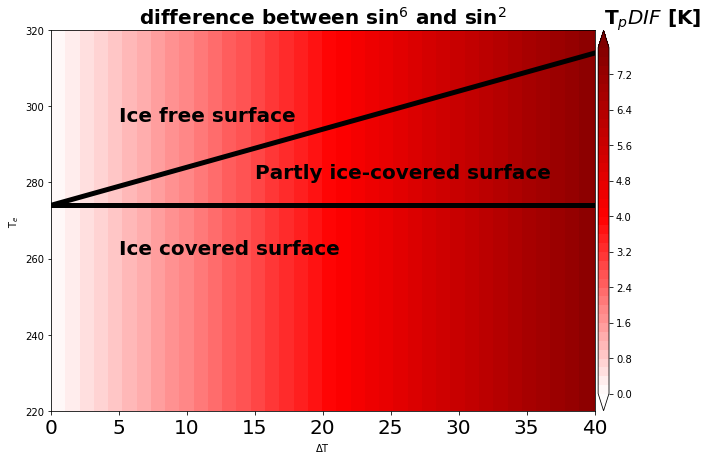

In [83]:
Dif6 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif6[i][j] = TP_6[i][j] - TP[i][j]

print('min: ' + str(round(Dif6.min(),2)) +
      ', max: ' + str(round(Dif6.max(),2)) )

plotcontourf(deltaT,Te,Dif6,minV=0,maxV=8,title='difference between sin$^6$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

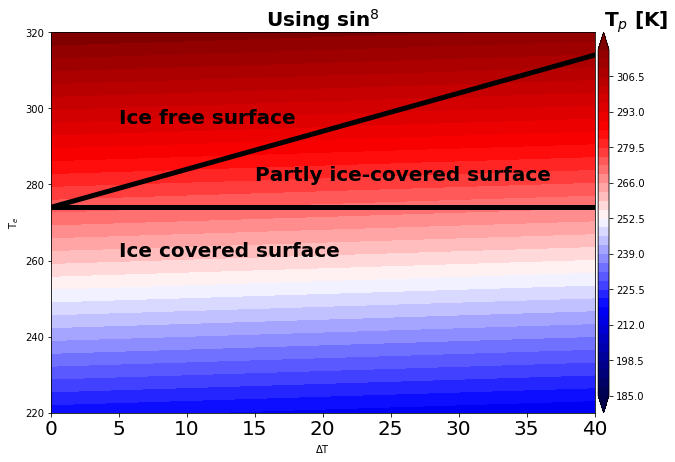

In [84]:
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_8=[]
for T in Te:
    Tprofrad_8=[get_temp_profile_8(T,t,latsnew) for t in deltaT]
    Tavrad_8=[get_weighted_average(tt,latsnew) for tt in Tprofrad_8] #planetary average
    TP_8.append(Tavrad_8)

plotcontourf(deltaT,Te,TP_8,minV=185,maxV=320,title='Using sin$^8$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 8.89


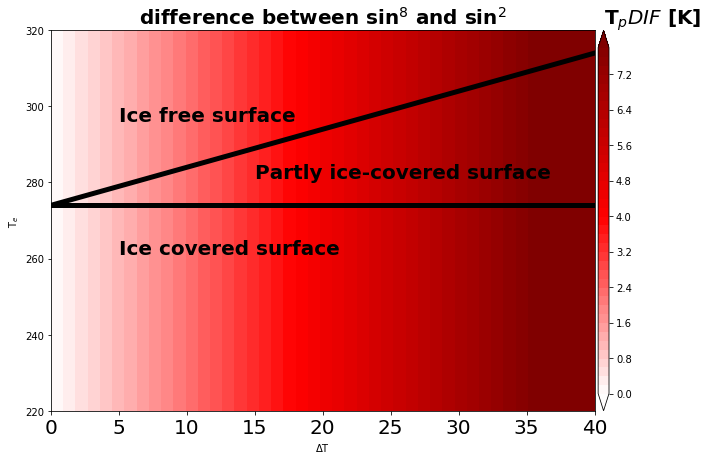

In [85]:
Dif8 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif8[i][j] = TP_8[i][j] - TP[i][j]

print('min: ' + str(round(Dif8.min(),2)) +
      ', max: ' + str(round(Dif8.max(),2)) )

plotcontourf(deltaT,Te,Dif8,minV=0,maxV=8,title='difference between sin$^8$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

In [86]:
print(min(min(TP_4)),min(min(TP_6)),min(min(TP_8))) #here we notice the increase in the max Tp

212.00268627948012 214.28859273243515 215.5585409124395


We notice that the planetary temperature is increasing faster for higher exponents, so the contours are "pushed down". This is seen mostly for high $\Delta$T. So the hypothesis I presented in the start is valid. The positive values in the difference-plots mean that the new $T_p$ is higher than for the exponent of 2. Since the effect of ocean heat transport (OHT) can be represented by varying the temperature profile (changing the exponent), we notice how an increase in OHT also influences the $T_p$ due to the transport of energy.

# Day 2

## Problem 1

We need to use the logistic albedo instead of the quadratic one and explain how the dynamics changes due to changes made in the exponent. The net radiation can be expressed as:


\begin{equation}
\qquad
net_{rad} =  \frac {S_0}{4}\left( 1-\alpha \right) + CF - OLR \left( CO_2, T \right)
\end{equation} 

where OLR is the outgoing longwave radiation seen from the space, CR is cloud forcing and $\alpha$ is the albedo.
Now let's import the functions for calculating the OLR, albedo and net radiation. S$_0$ is the solar constant at TOA.

In [87]:
#Tables and functions for doing polynomial fit to OLR(CO2,T)
#Modified for Neoproterozoic review paper calculations.
#Includes effect of pressure broadening, and keeping mass of N2/O2 air
#fixed at 1 bar.

#Note that the argument is not pCO2, but a measure of the
#mass of CO2 in the atmosphere -- the pressure the CO2 would
#have in isolation. Thus, pCO2bar/g is the mass added, and 12/44 of
#this is the mass of carbon added per square meter of surface.

#%-------------Table:Cubic fit to (T-275)----------------------------------------------------
#%**Layout: Make sure this table comes after the corresponding figure
#%Y = M0 + M1*x + ... M8*x\u8\n + M9*x\u9
#$CO_2$ , $a_o$   , $a_1$  , $a_2$      ,  $a_3$     \\
CO2Vals = [1,10.,100.,1000.,10000.,100000.,200000.]
logCO2Vals = [np.log(co2) for co2 in CO2Vals]
fitTcoeffs = []
#1 Pa
fitTcoeffs.append([273.64, 129.45, -23.005, -24.558])
#10Pa 
fitTcoeffs.append([261.53, 126.63, -15.683, -20.914])
#100 Pa
fitTcoeffs.append([247.92, 120.72, -9.6234, -16.334])
#1000 Pa
fitTcoeffs.append([231.35, 111.94, -3.4677, -11.163])
#10000 Pa
fitTcoeffs.append([205.21, 97.516, 7.7354, -1.9642])
#100000 Pa
fitTcoeffs.append([150.83, 61.94, 21.96, 13.443])
#200000 Pa
fitTcoeffs.append([125.16, 44.672, 23.01, 15.982])

#for i in range(len(fitTcoeffs[0])):
#    fitTcoeffs[:][i].reverse()

#\caption{Coefficients for polynomial fit $OLR = a_o + a_1 x + a_2 x^2 + a_3 x^3$,
#where $x = T_g - 275$. Calculation carried out with $rh = .5$.}
#%---------------------------------------------------------------------------------------------


#CO2 stand-alone pressure in Pa
def OLRT(CO2,T):
    x = (T-280.)/(330.-280.)
    y = np.log(CO2)
    #interpolate coefficients
    coeffs = []
    for i in range(len(fitTcoeffs[0])):
        a = [fitTcoeffs[j][i] for j in range(len(logCO2Vals))]
        coeffs.append(interp1d(logCO2Vals, a, 'linear', fill_value='extrapolate')(y))
    #Evaluate the polynomial
    #print(np.array(coeffs), x)
    return np.polyval(coeffs[::-1],x)

In [88]:
def albedo(T):
    
    if T <= T_ice_covered:
        return albedo_ice
    
    if T >= T_ice_free:
        return albedo_ocean
    
    r = (T - T_ice_free)**2/(T_ice_covered - T_ice_free)**2

    return albedo_ocean + (albedo_ice - albedo_ocean)*r

In [89]:
def albedo_logistic(T, exponent):
    
    if T <= T_ice_covered:
        return albedo_ice
    
    if T >= T_ice_free:
        return albedo_ocean
    
    T_mid = (T_ice_free + T_ice_covered)/2
    
    r = 1./(1 + np.exp(-exponent*(T - T_mid)))
    #print(r)
    # old = r = (T - T_ice_free)**2/(T_ice_covered - T_ice_free)**2
    return albedo_ice - (albedo_ice - albedo_ocean)*r

def net_radiation(co2, T, exponent, logistic=True):
    # We modified this function to use either the logistic expression or the quadratic expression for the albedo
    
    if co2 < 0:
        return 1e5
    if logistic:
        return solar_constant*(1 - albedo_logistic(T,exponent))/4 + 20 - OLRT(co2, T) # 20 (cloud forcing) is the contribution due to clouds (reducing OLR)
    
    else:
        return solar_constant*(1 - albedo(T))/4 + 20 - OLRT(co2, T)

T_mid = 275.0


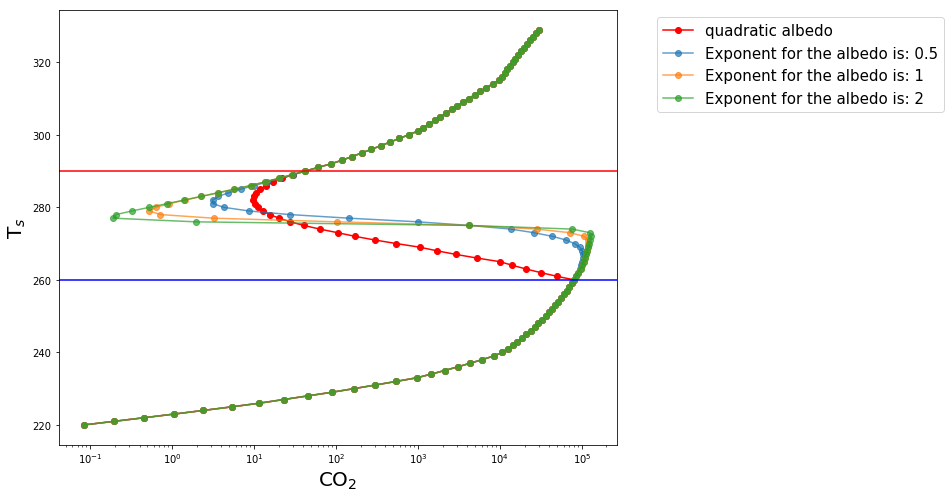

In [91]:
# here we define the requiring parameters and use the newton functio to calcualte the CO2 - OLR - T_surf dependence.

fig=plt.figure(figsize=(10,8))
T_ice_free = 290 
T_ice_covered = 260

print('T_mid = ' + str((T_ice_free + T_ice_covered)/2))

albedo_ocean = 0.2 #low albedo over oceans (more is absorbed)
albedo_ice = 0.65 #higher albedo over ice (less SW is absorbed)

solar_constant = 0.94*1367 #model was initially used for a time billions a year ago, not as bright as today

temperatures = range(220, 330) #range of temperatures


guess = 1e-2
list_co2=[]
for temperature in temperatures:
    try:
        co2 = newton(net_radiation, guess, args=(temperature,1, False), maxiter=200) #calculate the roots of a non-linear function
        list_co2.append(co2)
        #print(temperature, co2)
    except:
        list_co2.append(1e-4)

plt.semilogx(list_co2, temperatures, '-ro') #using the quadratic albedo
#for albedo_ice in [0.55, 0.6, 0.65]:
for exponent in [0.5,1,2]:
    list_co2 = []
    for temperature in temperatures:

        try:
            co2 = newton(net_radiation, guess, args=(temperature, exponent, True), maxiter=200) #calculate the roots of a non-linear function
            list_co2.append(co2)
            #print(temperature, co2)
        except:
            list_co2.append(1e-4)

    plt.semilogx(list_co2, temperatures, '-o',label=str(exponent),alpha=0.7)# using the logistic albedo with different exp.

plt.axhline(T_ice_covered,color='b')
plt.axhline(T_ice_free, color='r')
plt.xlabel('CO$_2$',fontsize=20)
plt.ylabel('T$_s$',fontsize=20)
Label=['Exponent for the albedo is: ' + str(ex) for ex in [0.5,1,2]]
Label.insert(0, "quadratic albedo")
plt.legend(Label,ncol=1,bbox_to_anchor=(1.1,0.5,0.5,0.5),fontsize=15)
plt.show()

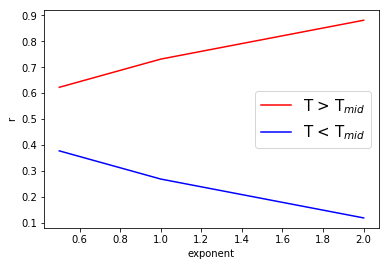

In [92]:
# this plot just shows the slope in the "r" for the albedo calculations, separated into temperatures above (red)
# and below (blue) the T_mid (275K), for different exponent to better analyze the figure above

c=[0.5,1,2]
y=[1/(1+math.exp(-cc)) for cc in c] #for T > T_mid
yy=[1/(1+math.exp(cc)) for cc in c] #for T < T_mid
plt.plot(c,y,color='r',label='T > T$_{mid}$')
plt.plot(c,yy,color='b',label='T < T$_{mid}$')
plt.ylabel('r')
plt.xlabel('exponent')
plt.legend(fontsize=15)
plt.show()

In [93]:
#calculating the albedo
Temp=np.arange(220,330,1)
c=[0.5,1,2]
W=[[albedo_logistic(T, exponent) for T in Temp] for exponent in c] #for the logistic albedo
quadal=[albedo(T) for T in Temp] #for the quadratic albedo

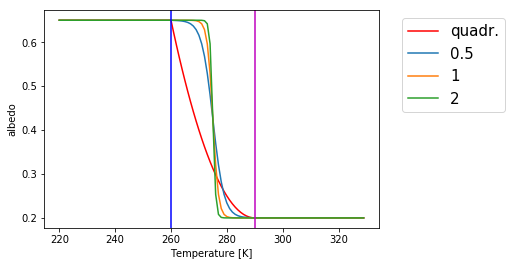

In [94]:
# plotting the albedos and the vertical lines for T_SB and T_IF
plt.plot(Temp,quadal,color='r')
for i in range(len(W)):
    plt.plot(Temp,W[i])
    plt.xlabel('Temperature [K]')
    plt.ylabel('albedo')
Label=[str(ex) for ex in [0.5,1,2]]
Label.insert(0,'quadr.')
plt.legend(Label,ncol=1,bbox_to_anchor=(0.9,0.5,0.5,0.5),fontsize=15)
plt.axvline(T_ice_free, color='m')
plt.axvline(T_ice_covered, color='b')
plt.show()

What we can see is that for a Snowball state (where the temperature is lower than T$_{SB}$  = 260K), the albedo is high, the earth is ice-covered until the T$_{SB}$ is reached. For the quadratic albedo, we notice an immediate drop in the albedo (from 0.65) straight after a warming from that treshold temperature. This changes more smoothly towards the new albedo for the Ice free state (reached at T$_{IF}$ = 290 K). On the contrary, when we follow the constant OLR, lets say from an IF state, the system is more stable, so we need to decrease the CO$_2$ even more in order for the system to convert from a IF state to a SB state, but once it reaches its treashold, the change is rapid, and with a small change in temperature at this treshold, the albedo changes immediately from one to the other. The system is more stable for higher exponents in the logistic_albedo calculations, i.e. it is harder to change between states, but once it happens, it happens quickly. From a SB state, with increasing temperature, the OLR is increasing, so in order to keep the equilibrium, we need to lower the CO$_2$, which explains the why the eq. curves start from lower values of CO$_2$ but with higher OLR values with higher temperatures. The intermediate state is defined by the albedo, which is a function of the temperature. For temperatures between T$_{SB}$  = 260K and T$_{mid}$, the curve has a negative gradient, resulting in lower r-values for the calculation of the albedo (see the figure with the r vs. exp). When increasing the temperature from the T$_{mid}$ to the T$_{IF}$  = 290K, the gradient is positive for r, also obtaining larger values. For higher exponents, r is either smaller (with negative gradient) or larger (with positive gradients). In other worlds, there is a larger lag before the one state is converted to the other state, thereby giving a rapid change in the albedo once the treshold is reached. The equilibrium state in the IF state is then reached again when OLR increases by increasing T$_{surf}$. We also notice that the surface temperature is controlling the albedo.

## Problem 2

In this exercise, we are supposed to use our 0.5 dimensional model, with one shell (one atmosphere) and figure out a energy balances for both the surface (s) and the shell (referred here as the atmosphere, a). 

<b>Case 1:</b> The shell is absorbing all the SW, but is transparent to LW.

<br>
    
<b>Case 2:</b> The shell partly absorbs the radiation in both LW ($\epsilon_L$) and SW ($\epsilon_S$).

### Case 1

The energy balance (IN = OUT) can be extpressed as following:

For the Earth:

\begin{equation}
\qquad
\sigma T_A^4 = \sigma T_S^4 
\end{equation} 

For the Shell:

\begin{equation}
\qquad
S_I = 2\sigma T_A^4
\end{equation} 


From the energy balance calculated for the Earth, we notice that:

\begin{equation}
\qquad
T_A = T_S
\end{equation}



### Case 2

The energy balance (IN = OUT) can be extpressed as following:

For the Earth:

\begin{equation}
\qquad
\epsilon_L \sigma T_A^4 + (1-\epsilon_S) S_I = \sigma T_S^4 
\end{equation} 

For the Shell:

\begin{equation}
\qquad
\epsilon_S S_I + \epsilon_L \sigma T_S^4 = 2\epsilon_L \sigma T_A^4 
\end{equation} 

By playing around with the equations, and starting off by extracting the incoming solar radiation and dividing by the Boltzman constant, we then get the form of $\frac {T_S}{T_A} $ as:

\begin{equation}
\qquad
\frac {T_S}{T_A} = \sqrt[4]{\frac {\epsilon_L (2-\epsilon_S)}{(\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S)}}
\end{equation} 


So now for the second question, if we want the temperature profile to be isothermal, i.e. not changing with height, so that T$_S$ = T$_A$, then the division with these values is equal to 1. Therefore, the above equation can be written as: 

\begin{equation}
\qquad
1 = \sqrt[4]{\frac {\epsilon_L (2-\epsilon_S)}{(\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S)}}
\end{equation} 

So:

\begin{equation}
\qquad
1 = \frac {\epsilon_L (2-\epsilon_S)}{\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S}
\end{equation} 

And

\begin{equation}
\qquad
 \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S= 2\epsilon_L-\epsilon_S \epsilon_L
\end{equation} 

And we end up with:

\begin{equation}
\qquad
\epsilon_S = \epsilon_L
\end{equation} 

The temperatures are the same only if the absorbing coefficients of the shell for both LW and SW obtain the same value.
<br>

Let's go back to the first question. The relationship between T$_S$ and T$_A$ depends on the relationship between $\epsilon_S$ and $\epsilon_L$ due to the fourth square root. So if the square root is larger than 1, then also the rational number is larger than one, i.e. T$_S$ > T$_A$. This happens only when $\epsilon_L$ > $\epsilon_S$. Similarily, when the square root is smaller than one, then  T$_S$ < T$_A$ when $\epsilon_L$ < $\epsilon_S$. So with higher surface temperature, more LW is absorbed by the shell, and less is absorbed from the SW. The temperature of the shell is greater when it is absorbing more SW, then less SW is going to the surface of the earth, why the temperature is also lower at the surface than for the shell. The relationship for temperatures for the shell and the surface are inverse proportional to the relationship between the absorbtion of LW or SW radiation by the shell.

So for T$_S$ > T$_A$, we get:


\begin{equation}
\qquad
 2\epsilon_L-\epsilon_S \epsilon_L > \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S
\end{equation}

And

\begin{equation}
\qquad
 \epsilon_L > \epsilon_S
\end{equation}

Similarily, when T$_S$ < T$_A$, then the root shall be <1, and:

\begin{equation}
\qquad
 2\epsilon_L-\epsilon_S \epsilon_L < \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S
\end{equation}

And finally:

\begin{equation}
\qquad
 \epsilon_L < \epsilon_S
\end{equation}

# Day 3

## Problem 1

In this problem, we are asked to calculate the energy budgets for the surface and the TOA using a fully consistent dry radiative-convective model. Per each timestep, we also want to calculate if the model conserves energy, when calculating the dry enthaply in the column and comparing it with the energy input. 

The dry enthalpy can be calculated as:

\begin{equation}
\qquad
\int_{top}^{surf}\frac{c_p T}{g} dp
\end{equation} 

where c$_p$ is the specific heat capacity (1004.64 $\frac{J}{kg K}$), T is the temperature (in Kelvin) and g is the acceleration due to gravity (9.80665 $\frac{m}{s^2}$).

Let us first implement our model:

<IPython.core.display.Javascript object>


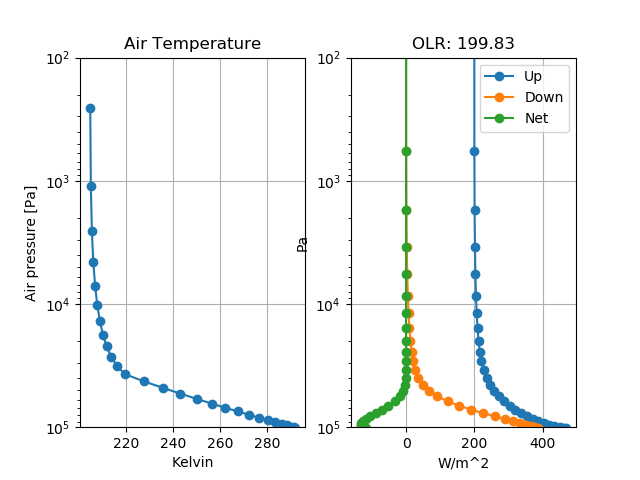

In [95]:
%matplotlib notebook

#import the libraries needed
from sympl import (
    AdamsBashforth, PlotFunctionMonitor)
from climt import (
    Frierson06LongwaveOpticalDepth, GrayLongwaveRadiation, SimplePhysics, DryConvectiveAdjustment,
    get_default_state, SlabSurface)
import climt
import sympl
from datetime import timedelta
import matplotlib.pyplot as plt
import metpy.calc as calc

#get the constants
c_p = sympl.get_constant('heat_capacity_of_dry_air_at_constant_pressure', 'J/kg/K')
g = sympl.get_constant('gravitational_acceleration', 'm/s^2')
sw_flux=200

# this is the function for plotting each state
def plot_function(fig, state): #model state as input
    ax = fig.add_subplot(1, 2, 1)

    ax.plot(
        state['air_temperature'].values.flatten(),
        state['air_pressure'].values.flatten(), '-o')
    ax.axes.invert_yaxis() #pressure other way
    ax.set_yscale('log') #natural scale for the atmosphere
    ax.set_ylim(1e5, 100.)
    ax.set_xlabel('Kelvin')
    ax.set_ylabel('Air pressure [Pa]')
    ax.set_title('Air Temperature')
    ax.grid()
    
# this plots the upwelling & downwelling radiation and the net radiation (UP-DOWN)
# also, the value for OLR is written in the header
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(
        state['upwelling_longwave_flux_in_air'].values.flatten(),
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Up')
    ax.plot(
        state['downwelling_longwave_flux_in_air'].values.flatten(),
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Down')
    ax.plot(
        state['upwelling_longwave_flux_in_air'].values.flatten() - state['downwelling_longwave_flux_in_air'].values.flatten()-sw_flux,
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Net')
    ax.axes.invert_yaxis()
    ax.set_yscale('log')
    ax.set_ylim(1e5, 100.)
    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Pa')
    ax.grid()
    ax.legend()
    ax.set_title('OLR: {:.2f}'.format(state['upwelling_longwave_flux_in_air'].values[-1].item()))
    
    #plt.tight_layout()
    

monitor = PlotFunctionMonitor(plot_function)
diagnostic = Frierson06LongwaveOpticalDepth()
radiation = GrayLongwaveRadiation(tendencies_in_diagnostics=True)

#surface is saturated, LHF are now being calculated
boundary_layer=SimplePhysics(use_external_surface_specific_humidity=True) #add a surface, for courpling
surface=SlabSurface()
dry_convection = DryConvectiveAdjustment() #insert convection

time_stepper = AdamsBashforth([radiation,surface]) #creating a model timestepper for the model to step forward in time
timestep = timedelta(hours=4) #model timestep of 4 hours

state = get_default_state([radiation, diagnostic, surface, boundary_layer, dry_convection]) #create the initial model state
state['downwelling_shortwave_flux_in_air'][:] = sw_flux
state['ocean_mixed_layer_thickness'][:] = 1.

dryenth=[]
TOA=[]
SURF=[]
NET=[]
timelist=[]

#then step forward in time, updating the new model state per each timestep
for i in range(6*7*4*20): # 20 months
    state.update(diagnostic(state))
    diagnostics, state = time_stepper(state, timestep)
    state.update(diagnostics)
    
    diagnostics, new_state = boundary_layer(state,timestep)
    state.update(new_state)
    state.update(diagnostics)
    
    diagnostics, new_state = dry_convection(state,timestep)
    state.update(new_state)
    state.update(diagnostics)
    
    #calculate the dry enthaply
    dp = (state['air_pressure_on_interface_levels'].to_units('pascal')[0:-1] -
            state['air_pressure_on_interface_levels'].to_units('pascal')[1:])
    dp = dp.rename({'interface_levels': 'mid_levels'})
    sensible_heat = c_p*state['air_temperature']*dp/g
    totenth=sensible_heat.sum(dim='mid_levels')
    totenth_value=totenth.values.flatten().tolist()
    dryenth.append(totenth_value)
    
    # budget equations
    LW_top=state['downwelling_longwave_flux_in_air'].values[-1]-state['upwelling_longwave_flux_in_air'].values[-1]
    LW_surf=state['upwelling_longwave_flux_in_air'].values[0]-state['downwelling_longwave_flux_in_air'].values[0]
    SW_top=state['downwelling_shortwave_flux_in_air'].values[-1]-state['upwelling_shortwave_flux_in_air'].values[-1]
    SW_surf=state['upwelling_shortwave_flux_in_air'].values[0]-state['downwelling_shortwave_flux_in_air'].values[0]
    SHF=state['surface_upward_sensible_heat_flux'].values[0]
    LHF=state['surface_upward_latent_heat_flux'].values[0]
    Surf=SW_surf+LW_surf+SHF+LHF #SURF budget
    Toa=LW_top+SW_top #TOA budget
    Tot=Surf+Toa #NET budget
    
    #append the value to the lists
    TOA.append(Toa.squeeze())
    SURF.append(Surf.squeeze())
    NET.append(Tot.squeeze())
    timelist.append(i*timestep.total_seconds()) #seconds
    if i % 20 == 0:
        monitor.store(state)
        
    state['eastward_wind'][:]=10. #include the wind

<IPython.core.display.Javascript object>


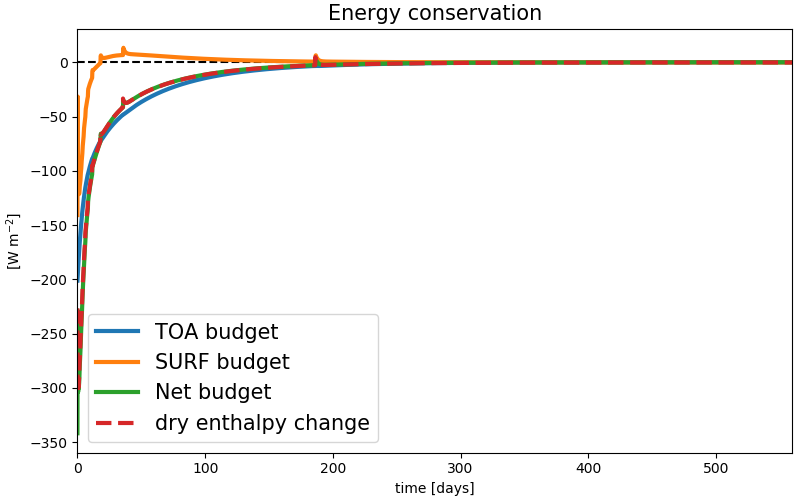

In [96]:
#%matplotlib notebook
#fig=plt.figure(figsize=(8,5))
timeday=[i/(3600*24) for i in timelist]
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,5))
#ax = fig.add_subplot(1,1,1)
#dif=[LW_net[i]+dryenth[i] for i in range(len(LW_net))]
dif_enth=np.diff(dryenth,axis=0)/timestep.total_seconds()
ax.axhline(y=0, color='k', linestyle='--')
ax.plot(timeday,TOA,label='TOA budget',linewidth=3)
ax.plot(timeday,SURF,label='SURF budget',linewidth=3)
ax.plot(timeday,NET,label='Net budget',linewidth=3)
ax.plot(timeday[0:3359],dif_enth,label='dry enthalpy change',linestyle="--",linewidth=3)
ax.set_xlabel('time [days]')
ax.set_ylabel('[W m$^{-2}$]')
ax.set_xlim([timeday[0],timeday[-1]])
ax.set_title('Energy conservation',fontsize=15)
ax.legend(fontsize=15,loc='best')

<IPython.core.display.Javascript object>


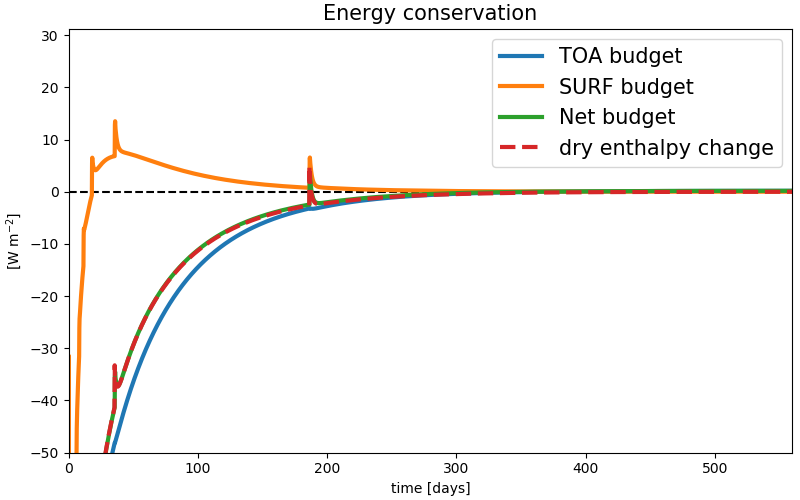

In [97]:
#plotting the energy budgets
timeday=[i/(3600*24) for i in timelist]
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,5))
dif_enth=np.diff(dryenth,axis=0)/timestep.total_seconds()
ax.axhline(y=0, color='k', linestyle='--')
ax.plot(timeday,TOA,label='TOA budget',linewidth=3)
ax.plot(timeday,SURF,label='SURF budget',linewidth=3)
ax.plot(timeday,NET,label='Net budget',linewidth=3)
ax.plot(timeday[0:3359],dif_enth,label='dry enthalpy change',linestyle="--",linewidth=3)
ax.set_xlabel('time [days]')
ax.set_ylabel('[W m$^{-2}$]')
ax.set_ylim([-50,None]) #zoom in
ax.set_xlim([timeday[0],timeday[-1]])
ax.set_title('Energy conservation',fontsize=15)
ax.legend(fontsize=15,loc='best')

## Problem 2

This exercise was about to analyse the result of the energy budgets calculated with the previous model, which is a fully consistent dry-radiative model. For each model time step (4hours), I calculated the energy budget at the surface (**SURF**) and st the top of the atmosphere (**TOA**). Importantly here is to notice that the first atmospheric layer (above the surface) also recieves energy from the turbulent heat fluxes (sensible and latent heat fluxes). Since the model is dry, the latent heat flux is zero. The idea was to see how much the atmosphere gains energy from radiation and how this is converted to dry enthalpy in the column. When the model conserves energy, the net energy budget (gain at the top + surface) is equal to the change in the dry enthalpy, which can be seen in the figures above. 
<br>
The system always tries to reach to equilibrium, i.e. where the net budget is zero (non-changing, im equilibrium). This means, everything that the system is gaining, it is also losing, so nothing is over as a rest. In the start of the run, the model is not in equilibrium, but as it goes on, it strives to reach equilibrium. We notice that both the surface and toa budgets are negative in the start, but as the time goes past, the SURF is changing more rapaidly than at the top of the atmosphere. This is due to processes happening on different scales. Convection and surface processes (fluxes) are happening much faster compared to only radiative contributions (as for the TOA). Thereby, the surface budget changes rapidly and also reaches equilibrium before the TOA reaches it. In other words, in the bottom part of the model the convection is active, whereas in the top the radiation is most active. The radiative timescale is weeks/months, and this is the only impact in the TOA, so we need to run the model for a longer time to reach the equilibrium (**that is when the net flux = 0**)!! This is important to keep in mind when measuring the energu balance of the earth, that processes at different scales impact the budgets in with different time contributions, and thereby influences how fast the system can reach equilibrium. The radiation balance at the TOA slows down the process to reach equilibrium there.

# Day 4-5

In this exercise we could chose wether we want to do **Exercise 1** or **Exercise 2**. I decided to work with the first one. In this exercise, we are adding a seasonal cycle to the single column model, and we want the model to reach equilibrium (as in the previous one). In comparison to the previous exercise, now the diurnal variation of sunlight actually makes the model to take more time to reach equilibrium. We set the `ocean mixed layer thicknes` to 5 meters to allow larger diurnal cycles, but apparently this makes the model to reach equilibrium even faster. The diurnal varations, and thereby the variations of the sun, is fully decided by the latitude of the model, so at different latitudes the zenith angle is changed, and diffrent amount of sunlight is received by the model, when changing the latitude. We want to investigate at which latitude we obtain that the surface temperature is running away ((T$_s$) > 315 K).

<IPython.core.display.Javascript object>


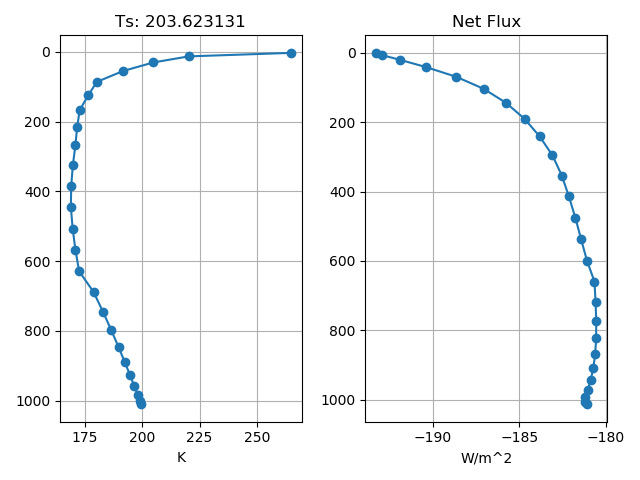

TOA flux: 624.1464831382796
Surf flux: -579.403765050763
T_s:  268.0
TOA flux: 74.31914473292798
Surf flux: -78.72489138196582
T_s:  268.3519121119481
TOA flux: 361.24192179337194
Surf flux: -328.5718847139288
T_s:  268.0276092924368
TOA flux: -229.14850430566918
Surf flux: 166.4491250902365
T_s:  268.30675738805377
TOA flux: -224.20683435443098
Surf flux: 160.78476876792925
T_s:  268.7175772550188
TOA flux: 598.602597238092
Surf flux: -514.5209177025481
T_s:  268.6007387114534
TOA flux: -214.38346516722487
Surf flux: 155.87708912627096
T_s:  268.6951319571005
TOA flux: -212.98280379139544
Surf flux: 157.2704745557043
T_s:  269.11613059612137
TOA flux: 599.1488891546103
Surf flux: -505.7424787693279
T_s:  269.2327016330649
TOA flux: -210.61963676928775
Surf flux: 156.92849434187798
T_s:  269.09846685855
TOA flux: -213.30034522630908
Surf flux: 161.45470344871927
T_s:  269.51371284697717
TOA flux: 366.57488083619603
Surf flux: -305.1252377109391
T_s:  269.81166117983685
TOA flux: 142.44

TOA flux: -167.25241514050902
Surf flux: 159.1526038487646
T_s:  276.61707131388346
TOA flux: 569.3821409845023
Surf flux: -460.9313642650957
T_s:  276.30993285405305
TOA flux: -240.14944036194882
Surf flux: 202.8969328833886
T_s:  276.39767119046246
TOA flux: -241.66402406393195
Surf flux: 204.71287047929854
T_s:  276.74530280043894
TOA flux: 650.693248472537
Surf flux: -530.8414026553934
T_s:  276.67820133608546
TOA flux: -240.03866411937406
Surf flux: 202.3434416041036
T_s:  276.52458779926945
TOA flux: -241.86739167524814
Surf flux: 204.14232011268015
T_s:  276.87059385027345
TOA flux: 485.74026915893273
Surf flux: -386.97561856784876
T_s:  277.03146224374177
TOA flux: -13.688681449848445
Surf flux: 35.80025552113506
T_s:  276.66274973340387
TOA flux: -241.8608057150473
Surf flux: 203.5759709776237
T_s:  276.99393927463274
TOA flux: 120.97453763907254
Surf flux: -75.01349953345746
T_s:  277.303414373486
TOA flux: 391.7074418070985
Surf flux: -306.16265436514146
T_s:  276.9013745711

TOA flux: 574.3771702454902
Surf flux: -458.389728844296
T_s:  280.62958614260873
TOA flux: -248.97049784334806
Surf flux: 196.87091013438265
T_s:  280.49393445159905
TOA flux: -250.85846816105868
Surf flux: 198.4355687916694
T_s:  280.7524796578279
TOA flux: 470.00868433085014
Surf flux: -370.0574235831951
T_s:  280.80487672103186
TOA flux: -135.6926421209949
Surf flux: 124.40374108566772
T_s:  280.46231838068684
TOA flux: -250.46515390850092
Surf flux: 197.70707606215188
T_s:  280.7148362180776
TOA flux: 171.18630093072875
Surf flux: -120.47101308832451
T_s:  280.9170871569472
TOA flux: 252.63012368197673
Surf flux: -188.46118777996563
T_s:  280.5007731780321
TOA flux: -250.07840894094142
Surf flux: 197.00813766474758
T_s:  280.67342156218797
TOA flux: -227.8991785698337
Surf flux: 188.1898990718469
T_s:  280.9267138958481
TOA flux: 506.8904026725218
Surf flux: -401.6050510792273
T_s:  280.62592342545963
TOA flux: -249.489739050076
Surf flux: 196.25740117635243
T_s:  280.628498531843

TOA flux: -249.3036467436303
Surf flux: 194.27617137236973
T_s:  280.7663958998895
TOA flux: -251.96993454692105
Surf flux: 196.02015582921763
T_s:  281.02413375025435
TOA flux: 313.3883833948337
Surf flux: -240.68347816684712
T_s:  281.1780835204937
TOA flux: 100.78512073910466
Surf flux: -65.21000724234712
T_s:  280.77399445505125
TOA flux: -251.78545719824444
Surf flux: 195.79295794210947
T_s:  280.9980699757756
TOA flux: -60.31685300613674
Surf flux: 64.51604341574514
T_s:  281.25100052618694
TOA flux: 428.90248029648143
Surf flux: -337.3560908474529
T_s:  280.8860603298976
TOA flux: -251.32727491934372
Surf flux: 195.55979082764733
T_s:  280.9759816076195
TOA flux: -252.51081079721533
Surf flux: 197.19980507546452
T_s:  281.24022507174317
TOA flux: 573.0113772654576
Surf flux: -458.7964965895865
T_s:  281.07058869501736
TOA flux: -250.54371314143782
Surf flux: 195.2976838376734
T_s:  280.9580234833104
TOA flux: -252.52324220861476
Surf flux: 196.96067781375785
T_s:  281.2240087081

TOA flux: -259.2115935803666
Surf flux: 201.73179055003885
T_s:  284.2595241588856
TOA flux: 35.85765635052985
Surf flux: -6.5693552105740665
T_s:  284.54900543782895
TOA flux: 430.8908213686987
Surf flux: -328.79614921247406
T_s:  284.15846431148424
TOA flux: -259.00790482505215
Surf flux: 201.2689351782035
T_s:  284.3164422729032
TOA flux: -259.9904054582423
Surf flux: 203.09638825899893
T_s:  284.6262488803543
TOA flux: 629.2881863396367
Surf flux: -493.1305677754201
T_s:  284.42595972474453
TOA flux: -258.4747159124696
Surf flux: 200.73971043237697
T_s:  284.3725116024655
TOA flux: -260.27080110075997
Surf flux: 202.57215663672162
T_s:  284.68116746536947
TOA flux: 582.3902163183593
Surf flux: -453.24881448419734
T_s:  284.71369892462417
TOA flux: -248.3025243382727
Surf flux: 196.87746235997722
T_s:  284.42755105962675
TOA flux: -260.37766713830695
Surf flux: 202.06292548127607
T_s:  284.7348290434533
TOA flux: 303.3790966163519
Surf flux: -222.27454677902614
T_s:  284.95290377098

TOA flux: -255.94177135650426
Surf flux: 196.65511094156363
T_s:  287.17314261725414
TOA flux: 542.7374316375701
Surf flux: -415.59497134692464
T_s:  286.87909288802734
TOA flux: -263.9420998566762
Surf flux: 197.78116936443269
T_s:  286.88043673022537
TOA flux: -265.9334180562651
Surf flux: 199.36905855985654
T_s:  287.1412818693242
TOA flux: 587.3517795979717
Surf flux: -451.6942475285848
T_s:  287.0627422810253
TOA flux: -262.79761701986683
Surf flux: 196.99265364142713
T_s:  286.84909588804305
TOA flux: -265.67547572500564
Surf flux: 198.76901409567245
T_s:  287.1089434677703
TOA flux: 402.99832992008913
Surf flux: -301.1222058538384
T_s:  287.22614059239856
TOA flux: 4.837234820316951
Surf flux: 14.796304772846774
T_s:  286.8350701657657
TOA flux: -264.7367196709826
Surf flux: 197.72202651903166
T_s:  287.0766111400494
TOA flux: 41.18575819373399
Surf flux: -12.528387506949926
T_s:  287.31409357908046
TOA flux: 377.86752314049556
Surf flux: -281.5841670215583
T_s:  286.91522329780

TOA flux: 639.2878563842224
Surf flux: -490.4244385253071
T_s:  288.92299387989596
TOA flux: -268.16251848926004
Surf flux: 199.69490760715485
T_s:  288.8328399371738
TOA flux: -270.8057794348313
Surf flux: 203.42443732136823
T_s:  289.1287874839254
TOA flux: 565.221457231992
Surf flux: -426.5655107653091
T_s:  289.17756543379215
TOA flux: -208.63773616213822
Surf flux: 168.51902510313857
T_s:  288.8621682541955
TOA flux: -270.5318651550747
Surf flux: 202.81120885493152
T_s:  289.1574036804668
TOA flux: 260.18520579373126
Surf flux: -181.53088493624315
T_s:  289.3825427016507
TOA flux: 240.06302913392034
Surf flux: -165.60098103463002
T_s:  288.95786180642426
TOA flux: -270.39918171389365
Surf flux: 202.41734174292816
T_s:  289.1847016821134
TOA flux: -183.8887115080996
Surf flux: 155.95736471559567
T_s:  289.4835102930319
TOA flux: 555.4358957520589
Surf flux: -421.761530053083
T_s:  289.1596505217837
TOA flux: -269.01749115118264
Surf flux: 202.55755458980548
T_s:  289.21734547445766

TOA flux: -273.3423991659781
Surf flux: 198.45638637177055
T_s:  291.3535284927469
TOA flux: -274.94100322415517
Surf flux: 200.2414272907897
T_s:  291.6049552089987
TOA flux: 307.6738661677056
Surf flux: -217.43275490500565
T_s:  291.76128905408854
TOA flux: 133.79105761901008
Surf flux: -83.77689577007054
T_s:  291.34121424398927
TOA flux: -274.70281371474266
Surf flux: 199.51738150465908
T_s:  291.5478364473443
TOA flux: -102.9747628398427
Surf flux: 95.72316780428201
T_s:  291.79038824543204
TOA flux: 468.3082542244326
Surf flux: -346.3213966579077
T_s:  291.4243407623588
TOA flux: -274.47278919296696
Surf flux: 198.76540870139257
T_s:  291.48644235705507
TOA flux: -275.0013546783559
Surf flux: 200.35092491359356
T_s:  291.7320754196554
TOA flux: 597.8217445829262
Surf flux: -449.40497065065466
T_s:  291.56522278883386
TOA flux: -273.74307357863705
Surf flux: 198.03042158934363
T_s:  291.4206474687636
TOA flux: -274.6734718694319
Surf flux: 199.58031962210657
T_s:  291.663070588878

TOA flux: -270.6579738211977
Surf flux: 193.6394386679995
T_s:  290.1238839010473
TOA flux: 48.02393027896392
Surf flux: -21.84195834859122
T_s:  290.30901088017555
TOA flux: 318.43178821897476
Surf flux: -233.74485445206238
T_s:  289.90526033983275
TOA flux: -270.15321762879637
Surf flux: 193.49199851364884
T_s:  290.0058587627665
TOA flux: -271.2502287036452
Surf flux: 194.9258566163107
T_s:  290.21806659529517
TOA flux: 525.4507399926026
Surf flux: -398.46835531140795
T_s:  289.9627997142903
TOA flux: -269.4097590122367
Surf flux: 193.1315080871832
T_s:  289.88991582548624
TOA flux: -271.1638345316194
Surf flux: 194.617512462653
T_s:  290.10282216543675
TOA flux: 516.7610514623099
Surf flux: -391.22326383735015
T_s:  290.04996175357144
TOA flux: -268.8468775747339
Surf flux: 192.93824272584075
T_s:  289.7763387671299
TOA flux: -271.0663251829593
Surf flux: 194.3205600595345
T_s:  289.9901441677476
TOA flux: 294.2393290699782
Surf flux: -213.34085161252736
T_s:  290.10841686998015
TO

TOA flux: -247.13435605416677
Surf flux: 191.7604875619018
T_s:  290.5116067012896
TOA flux: 567.0155789165779
Surf flux: -427.5115638487734
T_s:  290.21239940921583
TOA flux: -271.37383248803224
Surf flux: 200.24613691311808
T_s:  290.22928323760084
TOA flux: -272.77275291278136
Surf flux: 201.84490110795159
T_s:  290.5076390247181
TOA flux: 621.60875396665
Surf flux: -470.81667008842567
T_s:  290.433209703009
TOA flux: -270.76666481432875
Surf flux: 199.61998619561834
T_s:  290.2264691261283
TOA flux: -271.99390117130827
Surf flux: 201.65836359989993
T_s:  290.5051455526886
TOA flux: 430.42647902562834
Surf flux: -315.8737958777556
T_s:  290.63657191575834
TOA flux: 12.72292078030921
Surf flux: 9.86977402263102
T_s:  290.24342472099005
TOA flux: -272.223291684387
Surf flux: 201.21728000770833
T_s:  290.5042882823465
TOA flux: 45.42747514356046
Surf flux: -12.840130853808077
T_s:  290.7624012715911
TOA flux: 411.24946683456574
Surf flux: -300.66769123786855
T_s:  290.362371112749
TOA 

TOA flux: 614.8086010753175
Surf flux: -458.1681102195482
T_s:  292.23206700947145
TOA flux: -274.84753369717697
Surf flux: 198.30548498635102
T_s:  292.0705108808163
TOA flux: -276.20554499430875
Surf flux: 199.85771291579493
T_s:  292.32354626317596
TOA flux: 481.8246405050931
Surf flux: -352.55992527749413
T_s:  292.3891868507382
TOA flux: -112.61257644005968
Surf flux: 100.51366590232772
T_s:  292.02686330487586
TOA flux: -276.34917449827475
Surf flux: 199.30710183564702
T_s:  292.2723276404995
TOA flux: 146.83547603046122
Surf flux: -89.91092133983378
T_s:  292.48007804389084
TOA flux: 300.4137971092966
Surf flux: -210.90987678945731
T_s:  292.0602354818562
TOA flux: -275.93784840343466
Surf flux: 198.53145658145786
T_s:  292.21875449323653
TOA flux: -276.72933850980894
Surf flux: 200.1633651432147
T_s:  292.4692384043115
TOA flux: 558.6343337692047
Surf flux: -414.4031875970893
T_s:  292.1807029105319
TOA flux: -273.69671465150975
Surf flux: 196.57985264154945
T_s:  292.028923248

TOA flux: -250.30013846501848
Surf flux: 180.37939944271466
T_s:  282.88068843314676
TOA flux: -252.0342323193848
Surf flux: 181.66715075857155
T_s:  283.01066133366675
TOA flux: 234.85339124837614
Surf flux: -178.95624476524557
T_s:  283.0680871971388
TOA flux: -16.483807506047043
Surf flux: 20.826287293703885
T_s:  282.6527570971231
TOA flux: -250.85728012229873
Surf flux: 181.60838061788237
T_s:  282.77357727212296
TOA flux: -130.06931860231106
Surf flux: 107.8105725069671
T_s:  282.91002590758853
TOA flux: 323.5693582510006
Surf flux: -251.8861932179421
T_s:  282.5231633862542
TOA flux: -250.47062088138796
Surf flux: 182.04440616792758
T_s:  282.54697798981886
TOA flux: -251.9384510260705
Surf flux: 183.38008092490543
T_s:  282.6923706517095
TOA flux: 484.18041500635513
Surf flux: -383.9795013408875
T_s:  282.47547098256086
TOA flux: -249.59456047761088
Surf flux: 181.91835989430322
T_s:  282.33095232771467
TOA flux: -251.7385707366614
Surf flux: 183.4784158609706
T_s:  282.4819618

TOA flux: -255.68274634995728
Surf flux: 198.2407832878962
T_s:  283.0181593927403
TOA flux: 98.99345051530281
Surf flux: -59.58192822505215
T_s:  283.3007215752221
TOA flux: 389.21780388727234
Surf flux: -297.9579389288044
T_s:  282.91822222084903
TOA flux: -255.59655006031295
Surf flux: 198.22122268730277
T_s:  283.0978371660777
TOA flux: -256.6965070871144
Surf flux: 200.16739703189955
T_s:  283.41685171942277
TOA flux: 599.2045428749326
Surf flux: -472.64757223240304
T_s:  283.20178287870067
TOA flux: -255.3346363918846
Surf flux: 198.1853960399318
T_s:  283.1814746362352
TOA flux: -257.01871009581726
Surf flux: 200.12841806579655
T_s:  283.5023101062652
TOA flux: 583.5623461018201
Surf flux: -458.6789345523289
T_s:  283.51709140561337
TOA flux: -251.07765240279795
Surf flux: 196.84527578620012
T_s:  283.26871123999905
TOA flux: -257.3541048665602
Surf flux: 200.11231854823848
T_s:  283.59112989206056
TOA flux: 348.88986380552484
Surf flux: -262.58620355315406
T_s:  283.79971922933

TOA flux: -125.80205076591545
Surf flux: 117.7284935144844
T_s:  289.0727058241868
TOA flux: 554.8936726722907
Surf flux: -420.23142902157963
T_s:  288.79332550627646
TOA flux: -269.48618354830336
Surf flux: 204.34455026820706
T_s:  288.83560260450025
TOA flux: -270.45572455351584
Surf flux: 206.43541459402223
T_s:  289.16617601473934
TOA flux: 606.7125607941543
Surf flux: -461.4183603918849
T_s:  289.10187386363447
TOA flux: -268.74694330231677
Surf flux: 203.91246995215357
T_s:  288.92368831946044
TOA flux: -270.67664763028876
Surf flux: 205.87201119762133
T_s:  289.25274264305455
TOA flux: 453.4283604421937
Surf flux: -335.84885758823276
T_s:  289.3938767259122
TOA flux: 69.11343825341334
Surf flux: -31.143749530714572
T_s:  289.04216990389114
TOA flux: -270.84909606470353
Surf flux: 205.26533086586937
T_s:  289.3379452725747
TOA flux: 137.4212361730883
Surf flux: -82.93717573839095
T_s:  289.61925519187565
TOA flux: 406.0449809689861
Surf flux: -300.5332886244405
T_s:  289.25308067

TOA flux: 613.993086747746
Surf flux: -455.9688771251671
T_s:  293.02626917160046
TOA flux: -277.92094482683876
Surf flux: 202.04828511439578
T_s:  292.9072143086617
TOA flux: -278.96584256777464
Surf flux: 203.86428728563277
T_s:  293.1885661836686
TOA flux: 523.3395773965888
Surf flux: -383.1578643849865
T_s:  293.2370896671171
TOA flux: -124.71837134482556
Surf flux: 110.90076810386772
T_s:  292.9084856470871
TOA flux: -279.16925555919784
Surf flux: 203.0786466019692
T_s:  293.18170672820673
TOA flux: 228.09075152629987
Surf flux: -151.0946138490605
T_s:  293.39044731666144
TOA flux: 276.43774752569414
Surf flux: -190.60123666817293
T_s:  292.9814315133821
TOA flux: -279.0094099748623
Surf flux: 202.3945099181192
T_s:  293.1700958898099
TOA flux: -186.56466404664226
Surf flux: 154.6741754807096
T_s:  293.44397200198756
TOA flux: 545.9968235789452
Surf flux: -401.92628649767994
T_s:  293.1381004439542
TOA flux: -278.9719180906097
Surf flux: 201.61829056459743
T_s:  293.15388863138014

TOA flux: -270.1974569518359
Surf flux: 187.46651109831987
T_s:  291.3491061516537
TOA flux: -271.5477845178044
Surf flux: 188.55750607230192
T_s:  291.48925858363106
TOA flux: 177.09731736102304
Surf flux: -121.33972296781722
T_s:  291.5728924483152
TOA flux: 93.1281817250067
Surf flux: -58.69201183944753
T_s:  291.13822367392885
TOA flux: -270.96547851623984
Surf flux: 187.60976240722061
T_s:  291.2392484535417
TOA flux: -227.96063995545268
Surf flux: 169.35958943191076
T_s:  291.373183353067
TOA flux: 395.2768739939651
Surf flux: -293.6664254759928
T_s:  291.0093526567993
TOA flux: -270.34686462263005
Surf flux: 186.6633770028669
T_s:  290.9820647523497
TOA flux: -271.52230135481346
Surf flux: 187.7415867231755
T_s:  291.1115030421647
TOA flux: 492.4139221273942
Surf flux: -371.69485414883314
T_s:  290.9258866261612
TOA flux: -269.9839082306278
Surf flux: 185.75427026837673
T_s:  290.7178786900126
TOA flux: -271.1249544567582
Surf flux: 186.94058835635835
T_s:  290.8422525592901
TOA

TOA flux: -249.462850341079
Surf flux: 178.4471258817839
T_s:  282.3522158289853
TOA flux: -54.027138268125384
Surf flux: 48.52815305714782
T_s:  282.43229528660606
TOA flux: 206.34182932711022
Surf flux: -158.2411981870798
T_s:  282.01394357285415
TOA flux: -248.7686833369959
Surf flux: 178.4642613152177
T_s:  282.0349105005064
TOA flux: -249.7903246220437
Surf flux: 179.67624973705819
T_s:  282.1281116739498
TOA flux: 413.7144655430996
Surf flux: -328.2101119697361
T_s:  281.8447340038704
TOA flux: -247.49703136743554
Surf flux: 178.2058751090142
T_s:  281.7236453773922
TOA flux: -249.22490206822786
Surf flux: 179.54184422799466
T_s:  281.82004649269385
TOA flux: 410.5316309996729
Surf flux: -325.77788129426204
T_s:  281.7117484258541
TOA flux: -246.62754902455598
Surf flux: 178.23195858869084
T_s:  281.41910544667996
TOA flux: -248.2768712934509
Surf flux: 178.9791072165755
T_s:  281.51905420610547
TOA flux: 198.7831658692625
Surf flux: -150.77540462860932
T_s:  281.5570150222056
TO

TOA flux: -192.23279133706103
Surf flux: 163.4007194794191
T_s:  279.5228689554241
TOA flux: 512.0462898636281
Surf flux: -409.35808760898004
T_s:  279.22088914388826
TOA flux: -245.15298187460243
Surf flux: 191.37747162997584
T_s:  279.27240642952927
TOA flux: -246.62555709682368
Surf flux: 193.24677157955756
T_s:  279.55968738059937
TOA flux: 590.7945214025435
Surf flux: -475.5794917659039
T_s:  279.4778132609036
TOA flux: -244.68087855105776
Surf flux: 191.35585573356286
T_s:  279.31272219947766
TOA flux: -246.7839983784545
Surf flux: 193.29282582266669
T_s:  279.6041527197603
TOA flux: 436.29003574242904
Surf flux: -344.0201531942381
T_s:  279.7326531481868
TOA flux: -27.56133138239946
Surf flux: 38.574751271906564
T_s:  279.37326751327066
TOA flux: -246.83405935455093
Surf flux: 193.32419254824833
T_s:  279.656556515478
TOA flux: 93.73832980684546
Surf flux: -58.31210904247019
T_s:  279.9240752613135
TOA flux: 358.731744238042
Surf flux: -278.79796440297594
T_s:  279.5374722580503

TOA flux: 622.8722801410265
Surf flux: -484.1857179014465
T_s:  285.30616499928925
TOA flux: -261.0337690711983
Surf flux: 202.2846494865231
T_s:  285.2074234349976
TOA flux: -261.7892296703029
Surf flux: 204.7288584940238
T_s:  285.55348817294396
TOA flux: 524.8928494360604
Surf flux: -404.2380141514549
T_s:  285.65326304891477
TOA flux: -49.65249243285945
Surf flux: 60.458502423351874
T_s:  285.3432146344115
TOA flux: -262.44903700631875
Surf flux: 204.9631545497619
T_s:  285.67585211785286
TOA flux: 245.79464231536178
Surf flux: -173.54829648666316
T_s:  285.94158097134624
TOA flux: 320.8759947954642
Surf flux: -236.08774956528342
T_s:  285.56228140506903
TOA flux: -261.64265263162054
Surf flux: 204.18655086557428
T_s:  285.7950791881535
TOA flux: -135.8088400614211
Surf flux: 126.80645372525406
T_s:  286.1364332823454
TOA flux: 563.2739912642764
Surf flux: -434.6891538188583
T_s:  285.8651796091689
TOA flux: -261.5589044253452
Surf flux: 204.0556109141837
T_s:  285.9131176604489
TO

TOA flux: -234.14137753819452
Surf flux: 185.73077515774253
T_s:  290.6396227451718
TOA flux: -274.093263364232
Surf flux: 204.72136642732107
T_s:  290.9499199641053
TOA flux: 369.3456390212129
Surf flux: -265.2839602799059
T_s:  291.12956092645135
TOA flux: 162.98364351283578
Surf flux: -103.83928438301692
T_s:  290.7443720254125
TOA flux: -274.37525324690085
Surf flux: 204.12437900470968
T_s:  290.9999375713376
TOA flux: 3.1638027865662934
Surf flux: 20.350011708864848
T_s:  291.28975519975427
TOA flux: 477.25617439878516
Surf flux: -353.5477373194807
T_s:  290.94038309149244
TOA flux: -275.2720137708847
Surf flux: 203.36322329524256
T_s:  291.04793010199893
TOA flux: -275.9819418371583
Surf flux: 205.3564969702917
T_s:  291.3555760167874
TOA flux: 613.9911747655497
Surf flux: -462.558287949125
T_s:  291.19572469487775
TOA flux: -274.62097997222116
Surf flux: 203.04647544303253
T_s:  291.09219477499954
TOA flux: -275.9334437850923
Surf flux: 204.75415404796382
T_s:  291.3970068447465

TOA flux: -274.0254252460257
Surf flux: 194.55117274168128
T_s:  292.04155990930695
TOA flux: -25.17794716016556
Surf flux: 35.89273966576531
T_s:  292.22401380544477
TOA flux: 358.00354777133623
Surf flux: -259.5603024081502
T_s:  291.8199019108891
TOA flux: -273.53039493552774
Surf flux: 193.53500198804824
T_s:  291.8893407020508
TOA flux: -273.8500928700781
Surf flux: 194.89604083101898
T_s:  292.08069409944716
TOA flux: 541.4398742679541
Surf flux: -404.410770288229
T_s:  291.8436986108932
TOA flux: -272.49357726199725
Surf flux: 192.63134765003298
T_s:  291.7290201369063
TOA flux: -273.40795970472846
Surf flux: 193.90993100452738
T_s:  291.9150262516207
TOA flux: 489.86869005848393
Surf flux: -363.6227430212733
T_s:  291.87584044188173
TOA flux: -271.58267495907904
Surf flux: 191.7125291689647
T_s:  291.5607947807563
TOA flux: -272.9614063980206
Surf flux: 192.97055228410142
T_s:  291.7413309770333
TOA flux: 218.0140610725739
Surf flux: -150.05704973895303
T_s:  291.85422285842935

TOA flux: -227.22633267666754
Surf flux: 159.92640411056246
T_s:  274.1336874828761
TOA flux: 134.86308758438437
Surf flux: -113.06158088253532
T_s:  273.76675057480077
TOA flux: -226.34834021739894
Surf flux: 159.1796009939725
T_s:  273.53987712416307
TOA flux: -226.64082606668623
Surf flux: 159.71839767167543
T_s:  273.3909021267674
TOA flux: 171.2335394594916
Surf flux: -143.33465250878277
T_s:  273.1232521088182
TOA flux: -223.94826114770504
Surf flux: 159.07141319861913
T_s:  272.7966056564407
TOA flux: -223.919907668673
Surf flux: 159.46347431483971
T_s:  272.64723093566477
TOA flux: 38.96245594028258
Surf flux: -33.935260097217835
T_s:  272.4662790937328
TOA flux: -222.22001790464026
Surf flux: 158.84665382383122
T_s:  272.05426837358317
TOA flux: -222.6045459035644
Surf flux: 159.23988363124542
T_s:  271.9055907719973
TOA flux: -215.47229409348867
Surf flux: 157.14638752004103
T_s:  271.7580609352191
TOA flux: 12.797971751138618
Surf flux: -12.98937111775357
T_s:  271.338999843

TOA flux: -193.74588527801174
Surf flux: 159.37190722801893
T_s:  256.71389800050775
TOA flux: 353.5994439078743
Surf flux: -313.207971336091
T_s:  256.508408365294
TOA flux: -192.5090366897179
Surf flux: 157.79454213837886
T_s:  256.3632815403918
TOA flux: -193.1976443185957
Surf flux: 159.73027191747192
T_s:  256.46019961804956
TOA flux: 306.0179872469293
Surf flux: -269.64526473176784
T_s:  256.4160471452165
TOA flux: -192.16258265880924
Surf flux: 158.03438379224053
T_s:  256.11947370647874
TOA flux: -192.66323625001698
Surf flux: 159.86980951654328
T_s:  256.227098907664
TOA flux: 93.90546510930963
Surf flux: -77.84714438571264
T_s:  256.3066171812682
TOA flux: 83.4561983631607
Surf flux: -69.41468363049003
T_s:  255.9294595824782
TOA flux: -192.31479235870933
Surf flux: 159.94368537751126
T_s:  256.0154837698665
TOA flux: -193.33118036819891
Surf flux: 161.72192689863604
T_s:  256.1421867827912
TOA flux: 318.7943091156633
Surf flux: -281.4974960102286
T_s:  255.8470460226571
TOA 

TOA flux: 523.5136546494446
Surf flux: -455.4659961981606
T_s:  261.0439727143726
TOA flux: -95.6166175912742
Surf flux: 99.01856313278537
T_s:  260.86537248708134
TOA flux: -209.2254963516528
Surf flux: 185.8878867867123
T_s:  261.28226443646076
TOA flux: 344.4230605549534
Surf flux: -291.0695688868971
T_s:  261.5636534592537
TOA flux: 224.20534105838618
Surf flux: -184.47108659832057
T_s:  261.2729476097515
TOA flux: -209.83211617768282
Surf flux: 186.09241675662489
T_s:  261.61706794442375
TOA flux: 54.93409326101343
Surf flux: -29.867691705061045
T_s:  262.0196963792519
TOA flux: 467.028030824569
Surf flux: -402.8795725982495
T_s:  261.7773438431143
TOA flux: -210.46438415311718
Surf flux: 186.2286128908602
T_s:  261.96028340696114
TOA flux: -211.49444034521582
Surf flux: 188.4572186196369
T_s:  262.3959645580655
TOA flux: 564.5385605331837
Surf flux: -489.9045854819084
T_s:  262.34277583116443
TOA flux: -210.9515632094344
Surf flux: 186.63879504518928
T_s:  262.3110653516044
TOA f

TOA flux: 131.0398330748549
Surf flux: -88.75789214287119
T_s:  275.1819991136677
TOA flux: -241.55412524267092
Surf flux: 203.7822525310844
T_s:  275.55200109689747
TOA flux: 202.39590893217309
Surf flux: -148.70888558297392
T_s:  275.89563451017096
TOA flux: 400.2388912302165
Surf flux: -319.52439264517074
T_s:  275.60124569186405
TOA flux: -241.71803483883556
Surf flux: 203.22003293249455
T_s:  275.82980450164
TOA flux: -109.43620245586814
Surf flux: 111.81800833093065
T_s:  276.2433023086736
TOA flux: 552.2188869894777
Surf flux: -450.7808120560895
T_s:  276.0726703269606
TOA flux: -241.81895471994446
Surf flux: 202.60313857593846
T_s:  276.09839756729514
TOA flux: -243.87894515409425
Surf flux: 204.54573636607938
T_s:  276.51280707999024
TOA flux: 544.0152575588861
Surf flux: -442.58517383071967
T_s:  276.5548924097833
TOA flux: -89.85142050435113
Surf flux: 94.88930724169057
T_s:  276.36574518429205
TOA flux: -244.1802632933863
Surf flux: 203.87709838044123
T_s:  276.766015226840

TOA flux: -248.66788270881827
Surf flux: 189.75146238272595
T_s:  280.17149496353943
TOA flux: -205.6682519793384
Surf flux: 168.27737121210365
T_s:  280.3439868822834
TOA flux: 408.9952532865713
Surf flux: -323.65305784617476
T_s:  280.0372179017819
TOA flux: -247.6361402784405
Surf flux: 188.61621812771511
T_s:  279.9836165860431
TOA flux: -248.7571187080084
Surf flux: 189.6235530809588
T_s:  280.14697735873204
TOA flux: 440.16670300666794
Surf flux: -350.40509768106386
T_s:  280.0184594475167
TOA flux: -246.4014064158395
Surf flux: 187.4837733938079
T_s:  279.7796647718948
TOA flux: -248.28451970687246
Surf flux: 188.51708353427296
T_s:  279.93337364590394
TOA flux: 285.92709680160044
Surf flux: -221.90790360168182
T_s:  279.96367020440476
TOA flux: -21.65459388741081
Surf flux: 28.948216262858796
T_s:  279.57567157246615
TOA flux: -247.3828439798278
Surf flux: 187.3762122344921
T_s:  279.7035515264159
TOA flux: -11.729393926136822
Surf flux: 20.996737761282045
T_s:  279.82594410818

TOA flux: -214.86164262847615
Surf flux: 162.98555588244622
T_s:  267.10289358778095
TOA flux: 223.13212833537168
Surf flux: -190.97069612385428
T_s:  266.83141369139213
TOA flux: -213.34989898126605
Surf flux: 161.62677512558335
T_s:  266.55164672134856
TOA flux: -213.47376604937483
Surf flux: 162.03192008851664
T_s:  266.4507973948782
TOA flux: 126.34488785122508
Surf flux: -107.66831506366864
T_s:  266.28529670851714
TOA flux: -211.81330220561128
Surf flux: 160.66471160927594
T_s:  265.89795260762685
TOA flux: -211.84862961078989
Surf flux: 161.02818321785648
T_s:  265.7935185129558
TOA flux: -111.8105136001305
Surf flux: 92.37058600637435
T_s:  265.68427251501987
TOA flux: -11.830989274316153
Surf flux: 9.482010535496709
T_s:  265.25763437422904
TOA flux: -210.26608155334438
Surf flux: 160.01469157105112
T_s:  265.13269944443584
TOA flux: -210.31409250947567
Surf flux: 160.42706315041957
T_s:  265.0242325581038
TOA flux: 171.88037542632313
Surf flux: -148.46753950452555
T_s:  264.6

TOA flux: -174.0292272010781
Surf flux: 141.62458776818943
T_s:  248.8840633064153
TOA flux: 266.90271740934304
Surf flux: -240.06910086785692
T_s:  248.76074448857764
TOA flux: -173.16105149756692
Surf flux: 140.43301071710889
T_s:  248.51202594584646
TOA flux: -173.2847329289829
Surf flux: 141.11941164947063
T_s:  248.53840624111425
TOA flux: 110.65839982362886
Surf flux: -97.63632506713321
T_s:  248.53020672882715
TOA flux: -82.48438611553
Surf flux: 72.59202565908026
T_s:  248.1811948537967
TOA flux: -172.59229899986906
Surf flux: 140.6925781238879
T_s:  248.2146601588667
TOA flux: -157.86945077250363
Surf flux: 133.76441947130866
T_s:  248.25749509719267
TOA flux: 180.77131668902595
Surf flux: -162.0211784799389
T_s:  247.933892817424
TOA flux: -171.98275710553696
Surf flux: 140.36808105585757
T_s:  247.91267663799968
TOA flux: -172.1821836808198
Surf flux: 141.2136513016234
T_s:  247.9659739724595
TOA flux: 310.0567009264357
Surf flux: -279.6194053809295
T_s:  247.77128419270775


TOA flux: -182.39136588626002
Surf flux: 169.73350903350072
T_s:  250.02148359194078
TOA flux: 391.1533791657398
Surf flux: -343.45343714414906
T_s:  250.21599763818313
TOA flux: 63.89742401522463
Surf flux: -42.84925115945785
T_s:  249.94333056790634
TOA flux: -183.02419923507736
Surf flux: 169.5908486482701
T_s:  250.28906994925802
TOA flux: 128.55794814017463
Surf flux: -100.0348608506511
T_s:  250.62532518718447
TOA flux: 355.82923314743186
Surf flux: -312.4446766963712
T_s:  250.34128458973447
TOA flux: -183.69762616165528
Surf flux: 169.64021312185
T_s:  250.57535573624256
TOA flux: -184.7543722391994
Surf flux: 171.80149890346658
T_s:  250.96292672865354
TOA flux: 518.8462486513508
Surf flux: -463.6198715840322
T_s:  250.8309067803194
TOA flux: -184.40542162492306
Surf flux: 169.8275049041226
T_s:  250.87834420147254
TOA flux: -185.4819806266612
Surf flux: 172.03233311043874
T_s:  251.27400809259518
TOA flux: 508.7045002041422
Surf flux: -453.1983666389327
T_s:  251.361864628332

TOA flux: 301.1911361155749
Surf flux: -244.30834523985507
T_s:  266.21954140638616
TOA flux: 343.41064144504605
Surf flux: -283.7420936562721
T_s:  265.9456268559416
TOA flux: -221.86891554158404
Surf flux: 199.2223113118529
T_s:  266.2729553235339
TOA flux: 8.797743364520045
Surf flux: 15.270694612577003
T_s:  266.7318076254569
TOA flux: 534.0938004975155
Surf flux: -453.73405711369134
T_s:  266.54564242555927
TOA flux: -222.43960556106947
Surf flux: 198.0031370436217
T_s:  266.6799682650884
TOA flux: -224.29258349295475
Surf flux: 201.9146454901097
T_s:  267.1590905683915
TOA flux: 575.4316432462862
Surf flux: -490.5661368435076
T_s:  267.1749736390686
TOA flux: -146.81394370389023
Surf flux: 146.52996025625058
T_s:  267.07959906363135
TOA flux: -224.82451287060127
Surf flux: 201.41084460940706
T_s:  267.5526986282992
TOA flux: 456.8072527213793
Surf flux: -382.4070837050532
T_s:  267.78371492768065
TOA flux: 153.02122492083151
Surf flux: -113.21492581740088
T_s:  267.5318815779585


TOA flux: 411.39104662454884
Surf flux: -328.86239534507376
T_s:  276.83596179058736
TOA flux: -242.6531203565874
Surf flux: 195.9287785663238
T_s:  276.9220896150552
TOA flux: -243.88578075237476
Surf flux: 197.32177362410104
T_s:  277.20720186606246
TOA flux: 513.6803329979759
Surf flux: -416.6769542959125
T_s:  277.0542884277477
TOA flux: -242.22500804355306
Surf flux: 194.92515127425054
T_s:  276.94084824749274
TOA flux: -244.076924202143
Surf flux: 196.30119718459034
T_s:  277.21670556523327
TOA flux: 435.823806032845
Surf flux: -349.7780406375676
T_s:  277.25876879469683
TOA flux: -71.99916979673765
Surf flux: 74.83945766206806
T_s:  276.95301835974334
TOA flux: -243.95257535451003
Surf flux: 195.3334687816537
T_s:  277.2099410818743
TOA flux: 196.74534863096278
Surf flux: -146.59430620513086
T_s:  277.39848625632084
TOA flux: 239.98242627873262
Surf flux: -183.57155631618716
T_s:  277.02217567188313
TOA flux: -243.45567904669826
Surf flux: 194.41770229691093
T_s:  277.1867970823

TOA flux: -198.6943969048967
Surf flux: 148.75743657667053
T_s:  260.8261459413379
TOA flux: -198.28003750672391
Surf flux: 148.39158428001107
T_s:  260.57643101158385
TOA flux: 2.657455375836321
Surf flux: -5.836987906775509
T_s:  260.28481342950334
TOA flux: -196.40893187561718
Surf flux: 147.14834835758074
T_s:  259.91164590480656
TOA flux: -195.7479366151046
Surf flux: 146.71573043764005
T_s:  259.65623510466486
TOA flux: -132.10489550189115
Surf flux: 105.2757820591949
T_s:  259.3956211293875
TOA flux: -171.7984977690507
Surf flux: 133.9100502350392
T_s:  258.99090681755126
TOA flux: -193.991309054377
Surf flux: 145.53330832388423
T_s:  258.7295139118457
TOA flux: -193.6824161924905
Surf flux: 145.61318655405066
T_s:  258.4646705161902
TOA flux: -36.45961660491463
Surf flux: 26.460808881934753
T_s:  258.0813455399173
TOA flux: -192.47875725355635
Surf flux: 145.03734531731604
T_s:  257.7909189355379
TOA flux: -192.15498414589473
Surf flux: 145.0311366201911
T_s:  257.5186637058758

TOA flux: -135.15323785958512
Surf flux: 100.96776314268168
T_s:  231.43576634482207
TOA flux: -134.52680964413744
Surf flux: 102.58918684282105
T_s:  231.20444598323192
TOA flux: -97.34262185077704
Surf flux: 78.28064456332082
T_s:  230.97093556152646
TOA flux: -133.55279058392654
Surf flux: 102.06975646206774
T_s:  230.68686106527787
TOA flux: -133.13777428130973
Surf flux: 101.92910561847252
T_s:  230.4571030447437
TOA flux: -132.72692677678467
Surf flux: 101.798307378711
T_s:  230.2296935162368
TOA flux: -125.46202472473647
Surf flux: 98.30434990254362
T_s:  229.94634368481888
TOA flux: -131.77679454453184
Surf flux: 101.2649970881279
T_s:  229.72176997438012
TOA flux: -131.37969779828776
Surf flux: 101.137526136734
T_s:  229.49976808734894
TOA flux: -24.71448607785885
Surf flux: 17.36453985263423
T_s:  229.23450174445156
TOA flux: -130.4438327124844
Surf flux: 100.58352811673356
T_s:  228.99933313638127
TOA flux: -130.0614107475206
Surf flux: 100.46395409048297
T_s:  228.783171932

TOA flux: -112.89190732760514
Surf flux: 96.08649910894583
T_s:  218.16251674984804
TOA flux: 96.84707499734787
Surf flux: -84.17940851408592
T_s:  218.28697656471041
TOA flux: 105.02921563088645
Surf flux: -92.70766945328384
T_s:  218.08338638781024
TOA flux: -113.07864428290016
Surf flux: 96.45880425700136
T_s:  218.2117668487047
TOA flux: -91.90205945823891
Surf flux: 84.01641817420499
T_s:  218.38282768065983
TOA flux: 256.8165629966666
Surf flux: -232.93077620178028
T_s:  218.24096245015926
TOA flux: -113.31945026296823
Surf flux: 96.87214025238526
T_s:  218.291008701863
TOA flux: -113.74382404744973
Surf flux: 98.02020303419687
T_s:  218.47782158997717
TOA flux: 303.210363517068
Surf flux: -274.17791594438626
T_s:  218.46225196165494
TOA flux: -113.79789915091621
Surf flux: 100.2583590148469
T_s:  218.39414488888286
TOA flux: -114.24421064658569
Surf flux: 101.21956535481945
T_s:  218.58936907731652
TOA flux: 232.7526282113161
Surf flux: -207.54914062733215
T_s:  218.694746536654

TOA flux: -149.5252781521172
Surf flux: 147.14819937785433
T_s:  234.31249755871164
TOA flux: 167.448742221545
Surf flux: -132.86662931040672
T_s:  234.79697829659355
TOA flux: 422.4555020862308
Surf flux: -372.91806436515435
T_s:  234.74920426245774
TOA flux: -151.039795304373
Surf flux: 148.07005115558235
T_s:  235.01821105555558
TOA flux: -26.931812620555846
Surf flux: 46.3193074804372
T_s:  235.5698821846158
TOA flux: 482.11923927446685
Surf flux: -428.2604036127335
T_s:  235.64627283947465
TOA flux: -45.60133917687145
Surf flux: 61.52576953663853
T_s:  235.7390298158122
TOA flux: -153.98967962620387
Surf flux: 151.67534155896567
T_s:  236.2977873655037
TOA flux: 436.8308539358186
Surf flux: -384.97339778179645
T_s:  236.55149990877572
TOA flux: 150.70203527949664
Surf flux: -118.92745774540883
T_s:  236.5156775750858
TOA flux: -155.53729839090371
Surf flux: 152.64547168279177
T_s:  237.0174060310481
TOA flux: 300.21752396198013
Surf flux: -256.3721650617519
T_s:  237.4317365885828

TOA flux: -24.775918327734587
Surf flux: 36.88348116549024
T_s:  255.74931498555662
TOA flux: 399.22417143453373
Surf flux: -351.12236792970714
T_s:  255.6253969783106
TOA flux: -197.9483536204092
Surf flux: 179.39217626284835
T_s:  255.6458072824294
TOA flux: -201.22395800816932
Surf flux: 181.55024007652105
T_s:  256.01759237762496
TOA flux: 389.80917939474284
Surf flux: -341.7782084144197
T_s:  256.04417804500895
TOA flux: -22.04456136847395
Surf flux: 34.014052471527606
T_s:  255.89850979673713
TOA flux: -201.7293624583132
Surf flux: 183.69542792692553
T_s:  256.2315823232691
TOA flux: 275.705421776399
Surf flux: -236.24532633441277
T_s:  256.40676623451276
TOA flux: 172.01473950481667
Surf flux: -142.3659242105733
T_s:  256.1677727438872
TOA flux: -202.0164133009345
Surf flux: 183.05010617343038
T_s:  256.4083694403175
TOA flux: 86.95241877252406
Surf flux: -63.152000158445105
T_s:  256.68536390530494
TOA flux: 324.0463714773176
Surf flux: -282.04208671863535
T_s:  256.45935303629

TOA flux: -182.99655449356615
Surf flux: 154.73347917407955
T_s:  251.03245504861457
TOA flux: 153.01527283800738
Surf flux: -135.24355648916463
T_s:  250.80310325517144
TOA flux: -181.65243418908503
Surf flux: 151.78282459540114
T_s:  250.50591722127746
TOA flux: -181.44272706144926
Surf flux: 151.40518690850956
T_s:  250.40330102707668
TOA flux: 48.022540612107406
Surf flux: -41.37661474329798
T_s:  250.25565954329406
TOA flux: -120.72271712853826
Surf flux: 106.31582030822067
T_s:  249.8803979362215
TOA flux: -179.8875460874959
Surf flux: 148.57627492102876
T_s:  249.76820286117135
TOA flux: -136.2755039622707
Surf flux: 118.96977992824823
T_s:  249.65264980754222
TOA flux: 43.8423114136624
Surf flux: -40.01336368740089
T_s:  249.28243375756483
TOA flux: -178.32495901246944
Surf flux: 146.094741997711
T_s:  249.12445970905333
TOA flux: -178.08462138263715
Surf flux: 145.9231951788862
T_s:  249.001562716232
TOA flux: 124.68908814746081
Surf flux: -114.27055251200352
T_s:  248.7094677

TOA flux: -128.47891097045698
Surf flux: 99.87397876432473
T_s:  227.2369968310585
TOA flux: -79.04898572135625
Surf flux: 64.7991564527376
T_s:  227.00110196095952
TOA flux: -127.43885634902222
Surf flux: 98.32736131436268
T_s:  226.7282427722439
TOA flux: -126.98107445979245
Surf flux: 97.76291628226696
T_s:  226.4980366857231
TOA flux: -126.52466404465794
Surf flux: 97.2611543865443
T_s:  226.26903597858524
TOA flux: -125.96021067048999
Surf flux: 96.63645061857652
T_s:  225.9986598859805
TOA flux: -125.51643541336347
Surf flux: 96.21827220085059
T_s:  225.77203280848127
TOA flux: -125.0792865937309
Surf flux: 95.83406295246668
T_s:  225.54641851182586
TOA flux: -58.76064289132938
Surf flux: 46.705673788049175
T_s:  225.28531150359348
TOA flux: -124.10585887868768
Surf flux: 94.97507996700361
T_s:  225.05627723339444
TOA flux: -123.68474399322231
Surf flux: 94.68176153479732
T_s:  224.83360473427362
TOA flux: -34.674041359319276
Surf flux: 25.96165198443894
T_s:  224.59729444563112


TOA flux: 53.556404957747645
Surf flux: -47.665281651561564
T_s:  209.9525606931742
TOA flux: -66.45217481777394
Surf flux: 58.26710089623355
T_s:  209.7471639468475
TOA flux: -98.22934974800721
Surf flux: 80.49775194965216
T_s:  209.7618760643906
TOA flux: -98.31527806956477
Surf flux: 81.0245491740913
T_s:  209.78450228580647
TOA flux: 105.83658253903269
Surf flux: -96.11499090735148
T_s:  209.59664937557892
TOA flux: -98.01232477894958
Surf flux: 80.43723879843824
T_s:  209.589090039124
TOA flux: -98.1229253796638
Surf flux: 80.99939980739686
T_s:  209.62560209184863
TOA flux: 194.56898704517465
Surf flux: -177.87837475431138
T_s:  209.51823473206528
TOA flux: -97.84191917353206
Surf flux: 80.42523233105096
T_s:  209.44399226678553
TOA flux: -97.97782433732448
Surf flux: 81.02026825850446
T_s:  209.4944999316444
TOA flux: 169.49826849145683
Surf flux: -154.07572274317366
T_s:  209.48095692196284
TOA flux: -97.7202595454929
Surf flux: 80.45737370423466
T_s:  209.326946482278
TOA flux

TOA flux: 352.9998336845783
Surf flux: -311.35560050030045
T_s:  219.81367354431995
TOA flux: -120.31705856039541
Surf flux: 119.14705483001849
T_s:  220.1207855073634
TOA flux: -1.192838609774057
Surf flux: 20.38064719424748
T_s:  220.60446918928125
TOA flux: 452.42080908225137
Surf flux: -403.97463269739023
T_s:  220.62808411237347
TOA flux: -121.614584007675
Surf flux: 119.70124360054255
T_s:  220.77842390860113
TOA flux: -122.73544334170607
Surf flux: 121.91670321612874
T_s:  221.28384377412908
TOA flux: 444.52348953010994
Surf flux: -396.0740360290824
T_s:  221.47969785431087
TOA flux: 53.243896697462105
Surf flux: -31.589869754165118
T_s:  221.47878251739357
TOA flux: -124.09753786089189
Surf flux: 122.72036053642542
T_s:  221.9728611428206
TOA flux: 333.22885192757377
Surf flux: -290.9558494222532
T_s:  222.3328320315589
TOA flux: 258.9413393578856
Surf flux: -222.93857680209578
T_s:  222.26207444865153
TOA flux: -125.5030688243198
Surf flux: 123.6562477089797
T_s:  222.67953911

TOA flux: -168.1416557465832
Surf flux: 167.74736264568728
T_s:  246.27823111623627
TOA flux: -84.11092256847346
Surf flux: 99.30333109254386
T_s:  246.7975700002048
TOA flux: 461.4583693873707
Surf flux: -406.10087081521147
T_s:  246.8651049708987
TOA flux: -11.510441575896294
Surf flux: 31.904764993551655
T_s:  246.8625437266824
TOA flux: -180.4733748809919
Surf flux: 175.4898298421124
T_s:  247.35723248337456
TOA flux: 385.44023694165855
Surf flux: -334.57204158502805
T_s:  247.59584329857717
TOA flux: 180.1955064351836
Surf flux: -144.98344444396645
T_s:  247.47911756054955
TOA flux: -181.5817541429157
Surf flux: 175.58690055217681
T_s:  247.88801776983863
TOA flux: 225.73928545370515
Surf flux: -185.5391537493029
T_s:  248.26631395000882
TOA flux: 346.90716493872264
Surf flux: -300.1533740089187
T_s:  248.12974499919855
TOA flux: -182.6439044953395
Surf flux: 175.64011325962008
T_s:  248.39649808451978
TOA flux: 25.374409374983173
Surf flux: -0.8050721270594536
T_s:  248.856090113

TOA flux: -176.68817938273406
Surf flux: 142.15615125770947
T_s:  246.95346533219234
TOA flux: -176.31022532016829
Surf flux: 141.87157788257895
T_s:  246.78214839067093
TOA flux: -14.894156299076087
Surf flux: 7.4678224052228614
T_s:  246.54231922081325
TOA flux: -118.38236550785682
Surf flux: 98.56532557141799
T_s:  246.2153270811812
TOA flux: -174.408720489295
Surf flux: 139.6067927501849
T_s:  246.02337117328318
TOA flux: -74.87752417840315
Surf flux: 60.631594105962876
T_s:  245.81069227655036
TOA flux: -62.19161607965164
Surf flux: 48.82303284466868
T_s:  245.4667023298833
TOA flux: -172.46892618820243
Surf flux: 137.36703361963157
T_s:  245.2413513352836
TOA flux: -150.56568573772904
Surf flux: 123.93388161811357
T_s:  245.03206103024596
TOA flux: -28.350635434845913
Surf flux: 17.99470992505804
T_s:  244.7063424526418
TOA flux: -170.25222180879157
Surf flux: 129.64537694005432
T_s:  244.44629923935378
TOA flux: -169.30623133681974
Surf flux: 127.55536774530108
T_s:  244.2413327

TOA flux: -114.71861474638425
Surf flux: 88.93481674930169
T_s:  220.104892889009
TOA flux: -114.2419605149206
Surf flux: 88.24434665544238
T_s:  219.85767905258922
TOA flux: -113.76860610273039
Surf flux: 87.6325267582969
T_s:  219.61246736570834
TOA flux: -113.30293998495134
Surf flux: 87.19192735590006
T_s:  219.36870379598776
TOA flux: -112.86272743124937
Surf flux: 87.0936698383361
T_s:  219.12568261448655
TOA flux: -112.4272471114665
Surf flux: 86.98147640938558
T_s:  218.8829225821145
TOA flux: -111.99586465138843
Surf flux: 86.83677132770988
T_s:  218.64052170064085
TOA flux: -111.56511965920983
Surf flux: 86.66261526398551
T_s:  218.3985688395523
TOA flux: -111.1353984482947
Surf flux: 86.4641632212309
T_s:  218.15713620935256
TOA flux: -110.70767285295378
Surf flux: 86.25065310471633
T_s:  217.9162799632352
TOA flux: -110.28525748783049
Surf flux: 86.02933280837722
T_s:  217.67603134031526
TOA flux: -109.86282999220943
Surf flux: 85.79165139340749
T_s:  217.43642233832307
TOA

TOA flux: -80.53233769903818
Surf flux: 64.51865850051433
T_s:  199.11926262168896
TOA flux: -80.2726548136286
Surf flux: 64.30659109884651
T_s:  198.93961363409076
TOA flux: -80.0158680543547
Surf flux: 64.09569940451792
T_s:  198.76055398854092
TOA flux: -79.75965818884389
Surf flux: 63.88569056267539
T_s:  198.5820813994316
TOA flux: -79.50420016518986
Surf flux: 63.67539745740751
T_s:  198.404193891264
TOA flux: -79.24965894511101
Surf flux: 63.46502453661271
T_s:  198.22689490127564
TOA flux: -78.99560468280603
Surf flux: 63.252804614399096
T_s:  198.0501840307008
TOA flux: -78.74478209399606
Surf flux: 63.04501909110581
T_s:  197.87405928233463
TOA flux: -78.49600223745223
Surf flux: 62.839770888930154
T_s:  197.69851205353814
TOA flux: -78.24780500218036
Surf flux: 62.630751442415225
T_s:  197.5235420842672
TOA flux: -77.99968104499585
Surf flux: 62.42267917819147
T_s:  197.34915051627584
TOA flux: -77.75264447619512
Surf flux: 62.21522736458659
T_s:  197.17533675245028
TOA flux

TOA flux: 28.27229307374826
Surf flux: -24.486746216886736
T_s:  189.0703975601513
TOA flux: 154.18270710151558
Surf flux: -140.56936759839598
T_s:  189.05795506232263
TOA flux: -61.71717696075203
Surf flux: 51.72813629124151
T_s:  189.13306080463494
TOA flux: -29.701956189490588
Surf flux: 27.10536162013741
T_s:  189.34100791961092
TOA flux: 174.46899215361657
Surf flux: -159.2241891519575
T_s:  189.39480687800813
TOA flux: 7.425002128531503
Surf flux: -5.876805275053055
T_s:  189.4246098150714
TOA flux: -69.03152156019533
Surf flux: 56.680356698537686
T_s:  189.64951549603893
TOA flux: 155.95950085311563
Surf flux: -141.53623574511587
T_s:  189.78447682067056
TOA flux: 88.61222184619751
Surf flux: -79.81486366012474
T_s:  189.79178446653225
TOA flux: -69.66359007089736
Surf flux: 57.107362723661936
T_s:  190.0043368155924
TOA flux: 106.95069661445325
Surf flux: -95.93341051446971
T_s:  190.21694705310725
TOA flux: 160.18761747333133
Surf flux: -145.8531691231045
T_s:  190.23849867712

TOA flux: 142.09839757302103
Surf flux: -102.95915312527725
T_s:  219.67850812074352
TOA flux: 312.67147110241706
Surf flux: -263.29932322536666
T_s:  219.99332876363871
TOA flux: 130.5725484232218
Surf flux: -93.28208507243534
T_s:  220.3162032024407
TOA flux: 84.40850331350356
Surf flux: -49.84922944631544
T_s:  220.83173354993346
TOA flux: 296.54089343459435
Surf flux: -248.3602166422086
T_s:  221.20574984348917
TOA flux: 195.90687072697628
Surf flux: -154.71961945596317
T_s:  221.48121260146567
TOA flux: 52.078330316405385
Surf flux: -20.46354088472634
T_s:  221.9635363211032
TOA flux: 248.9870106774509
Surf flux: -203.93799470146894
T_s:  222.39952602894664
TOA flux: 256.7530609250233
Surf flux: -211.9893142306614
T_s:  222.65693598104176
TOA flux: 52.71546371375291
Surf flux: -21.604879964955483
T_s:  223.0800168986412
TOA flux: 182.4187100097053
Surf flux: -141.88762170258906
T_s:  223.56360108615453
TOA flux: 296.2308308706216
Surf flux: -249.2019450941502
T_s:  223.83629081589

TOA flux: 122.21462162078097
Surf flux: -105.74645495052228
T_s:  241.43907312175912
TOA flux: -21.88372412551098
Surf flux: 26.00514768952798
T_s:  241.2940920274876
TOA flux: -138.95535591677157
Surf flux: 129.24527052496313
T_s:  241.35308472465815
TOA flux: 74.66768880243131
Surf flux: -62.66563946593401
T_s:  241.32656165392672
TOA flux: 39.66504937967537
Surf flux: -31.367299712229574
T_s:  241.13613730458377
TOA flux: -156.6423487070789
Surf flux: 141.0323414103381
T_s:  241.129603536431
TOA flux: 1.4149510458074133
Surf flux: 3.6753215489493036
T_s:  241.14160320025974
TOA flux: 85.03372710687324
Surf flux: -74.12828092913293
T_s:  240.94226815352087
TOA flux: -140.4573817819958
Surf flux: 127.83366693547792
T_s:  240.85425243004858
TOA flux: -78.67615738168062
Surf flux: 75.02488328222621
T_s:  240.88004467030592
TOA flux: 98.58281453649138
Surf flux: -87.48886240044291
T_s:  240.70653414769518
TOA flux: -96.28001530168694
Surf flux: 89.30571238801306
T_s:  240.5386467099218
T

TOA flux: -116.98329088673023
Surf flux: 90.2612666235062
T_s:  220.3576432345224
TOA flux: -116.47825091779137
Surf flux: 89.88802697923059
T_s:  220.10642683798352
TOA flux: -115.97959289319705
Surf flux: 89.52054034384282
T_s:  219.85624251871195
TOA flux: -115.48591005002118
Surf flux: 89.15719278174674
T_s:  219.60707403031827
TOA flux: -114.99548364059626
Surf flux: 88.79390032776222
T_s:  219.35892079970512
TOA flux: -114.50758070121017
Surf flux: 88.4284215618184
T_s:  219.11178301261916
TOA flux: -114.02534816841356
Surf flux: 88.06804707359011
T_s:  218.86565881181912
TOA flux: -113.54848614401563
Surf flux: 87.71153583682279
T_s:  218.62053162491216
TOA flux: -113.07377704313976
Surf flux: 87.35600389513874
T_s:  218.3763980189486
TOA flux: -112.60177936701119
Surf flux: 87.00059052722085
T_s:  218.13325841080425
TOA flux: -112.13472218318495
Surf flux: 86.64848505140813
T_s:  217.8911092732002
TOA flux: -111.67353340655372
Surf flux: 86.30122441025082
T_s:  217.649934055359

TOA flux: -81.03586591824325
Surf flux: 64.59180247013349
T_s:  199.12241297796788
TOA flux: -80.76999941688267
Surf flux: 64.37925525789892
T_s:  198.94256252418344
TOA flux: -80.50747783247667
Surf flux: 64.1694042868781
T_s:  198.76329941552322
TOA flux: -80.24564384882827
Surf flux: 63.96128907809518
T_s:  198.58462074941977
TOA flux: -79.98453898915761
Surf flux: 63.74992185024981
T_s:  198.40652799840493
TOA flux: -79.7241413710389
Surf flux: 63.53898209502573
T_s:  198.22902144659434
TOA flux: -79.46438644813347
Surf flux: 63.327703940077846
T_s:  198.0521037689279
TOA flux: -79.20830770583079
Surf flux: 63.11994763144118
T_s:  197.87577258897397
TOA flux: -78.95376180422083
Surf flux: 62.912849028322654
T_s:  197.7000176004268
TOA flux: -78.70002668959638
Surf flux: 62.70383110668343
T_s:  197.5248414320103
TOA flux: -78.44739919113853
Surf flux: 62.498244133527855
T_s:  197.3502429253882
TOA flux: -78.19528767264532
Surf flux: 62.29133331745979
T_s:  197.1762221846964
TOA flux

TOA flux: 51.98788081910928
Surf flux: -47.41792839492348
T_s:  184.71983768996964
TOA flux: -61.71119507500814
Surf flux: 48.15125268389997
T_s:  184.6442754085182
TOA flux: -61.70931710090518
Surf flux: 48.23655751730282
T_s:  184.62558782135807
TOA flux: 50.24799163720142
Surf flux: -45.69803851700244
T_s:  184.5821527995804
TOA flux: -54.65009949930432
Surf flux: 44.32795083012061
T_s:  184.48146753917536
TOA flux: -61.57459210461902
Surf flux: 48.16971774317962
T_s:  184.4806215270622
TOA flux: 14.479454592344212
Surf flux: -13.18904070391915
T_s:  184.47769289028813
TOA flux: 20.936299680496617
Surf flux: -19.2081823717503
T_s:  184.3684878168564
TOA flux: -61.48999651533352
Surf flux: 48.15756785959933
T_s:  184.37280126057144
TOA flux: -39.87510145152173
Surf flux: 33.92120240582547
T_s:  184.3999070853755
TOA flux: 78.45052821840494
Surf flux: -71.47711920170343
T_s:  184.31735146945968
TOA flux: -61.45798493936413
Surf flux: 48.1971160822402
T_s:  184.30365427714577
TOA flux:

TOA flux: 174.93564934417896
Surf flux: -141.83463782376126
T_s:  204.3626448357155
TOA flux: 56.980582134699475
Surf flux: -31.662557739729625
T_s:  204.87890416288022
TOA flux: 269.6563874101496
Surf flux: -229.6259264944162
T_s:  205.31972617918237
TOA flux: 244.72838423769844
Surf flux: -206.89342834788405
T_s:  205.60199353414112
TOA flux: 51.801788405245176
Surf flux: -26.91156554198023
T_s:  206.07414788926596
TOA flux: 209.93589363425144
Surf flux: -173.40086179799317
T_s:  206.578948218325
TOA flux: 297.1347534533398
Surf flux: -255.71172922913183
T_s:  206.8766416209623
TOA flux: 80.56562321485058
Surf flux: -53.466854746520944
T_s:  207.28802261439168
TOA flux: 143.37305806582893
Surf flux: -111.07614483257089
T_s:  207.83172736902162
TOA flux: 318.612508989068
Surf flux: -275.4794462719371
T_s:  208.17578360910125
TOA flux: 136.49550930591664
Surf flux: -101.95266421688889
T_s:  208.52242445413603
TOA flux: 88.1214760365716
Surf flux: -56.18338783832518
T_s:  209.0610414746

TOA flux: 82.11519345588582
Surf flux: -57.509565768036545
T_s:  237.91018327862645
TOA flux: 79.53098990131414
Surf flux: -55.43843293181702
T_s:  238.0676313824506
TOA flux: 76.86219316396975
Surf flux: -53.29885886307541
T_s:  238.21927905620976
TOA flux: 74.23542873541678
Surf flux: -51.19672407927302
T_s:  238.3650200378327
TOA flux: 71.59025903735733
Surf flux: -49.08135103802313
T_s:  238.50481448861962
TOA flux: 68.86220765585469
Surf flux: -46.898536044257824
T_s:  238.63867232689051
TOA flux: 66.17936295046184
Surf flux: -44.75718615984564
T_s:  238.7665283072407
TOA flux: 63.47918811603989
Surf flux: -42.604195256936144
T_s:  238.88832538842448
TOA flux: 60.694556504582096
Surf flux: -40.379719607024924
T_s:  239.0040584519947
TOA flux: 57.955656346614745
Surf flux: -38.19760157285798
T_s:  239.11369617514808
TOA flux: 55.19936040040375
Surf flux: -36.00279918056114
T_s:  239.2171604861513
TOA flux: 52.50020363745884
Surf flux: -28.919865125312654
T_s:  239.3004180118856
TOA

TOA flux: -127.5440610315172
Surf flux: 97.48388714275133
T_s:  225.47975402794182
TOA flux: -126.93570817777405
Surf flux: 96.97920992351905
T_s:  225.20857734787378
TOA flux: -126.33397028636723
Surf flux: 96.48684565294828
T_s:  224.9387937735023
TOA flux: -125.74674880593331
Surf flux: 96.02985855611936
T_s:  224.67034252706523
TOA flux: -125.16734732299213
Surf flux: 95.61058149897018
T_s:  224.40309642614682
TOA flux: -124.59238691654998
Surf flux: 95.20412461610107
T_s:  224.13700660978057
TOA flux: -124.02421447584605
Surf flux: 94.80260450434359
T_s:  223.87204877997956
TOA flux: -123.4625996139792
Surf flux: 94.40604217339661
T_s:  223.60819631663418
TOA flux: -122.90468053091045
Surf flux: 94.01338061260401
T_s:  223.3454441430544
TOA flux: -122.35455604579036
Surf flux: 96.2169079671672
T_s:  223.08310111825938
TOA flux: -121.79513342791526
Surf flux: 94.56700635336384
T_s:  222.81722282694918
TOA flux: -121.30987717361853
Surf flux: 95.33759688445436
T_s:  222.552394754486

TOA flux: -86.86625943806804
Surf flux: 69.15067521772484
T_s:  202.96547506480323
TOA flux: -86.57097355235258
Surf flux: 68.93157900212
T_s:  202.77291634562374
TOA flux: -86.27637221195813
Surf flux: 68.71243566273958
T_s:  202.58096987552128
TOA flux: -85.98284875656016
Surf flux: 68.49110273030182
T_s:  202.3896375057609
TOA flux: -85.69001873768627
Surf flux: 68.27107331256387
T_s:  202.19892144513489
TOA flux: -85.39793168738989
Surf flux: 68.04893961662113
T_s:  202.00882275253832
TOA flux: -85.1101255913259
Surf flux: 67.82974763014423
T_s:  201.81933851276483
TOA flux: -84.82406616696458
Surf flux: 67.61310441979418
T_s:  201.63046040915233
TOA flux: -84.53791155297793
Surf flux: 67.39334560708001
T_s:  201.44219189221556
TOA flux: -84.25299783957209
Surf flux: 67.17396125315435
T_s:  201.25453414455126
TOA flux: -83.96874233309856
Surf flux: 66.9546128828864
T_s:  201.06749023678933
TOA flux: -83.68813004807325
Surf flux: 66.73664086249481
T_s:  200.88105682926707
TOA flux: 

TOA flux: -63.82133251046619
Surf flux: 49.85048446416006
T_s:  186.5202332323424
TOA flux: -63.64596983553134
Surf flux: 49.690554824542005
T_s:  186.38142341595588
TOA flux: -63.47084221440608
Surf flux: 49.53151791470943
T_s:  186.2430567788979
TOA flux: -63.29633983742746
Surf flux: 49.37110606652806
T_s:  186.1051347034384
TOA flux: -63.12319178078472
Surf flux: 49.21545753495404
T_s:  185.9676539220991
TOA flux: -62.95247009701502
Surf flux: 49.061471963469934
T_s:  185.83060659957033
TOA flux: -62.78233082499038
Surf flux: 48.90715054207838
T_s:  185.69398745804185
TOA flux: -62.61247688112202
Surf flux: 48.75189055949546
T_s:  185.55780068233554
TOA flux: -62.44335724473972
Surf flux: 48.599541704173134
T_s:  185.42204098985616
TOA flux: -62.27463450693512
Surf flux: 48.44714777061071
T_s:  185.28670858305827
TOA flux: -62.10629050697069
Surf flux: 48.294202806546046
T_s:  185.15180122950548
TOA flux: -61.938501415684115
Surf flux: 48.14323657249687
T_s:  185.01731563678638
TOA

TOA flux: 136.595339020081
Surf flux: -120.18617482151957
T_s:  188.8559453425322
TOA flux: 138.80860354347365
Surf flux: -120.43480724023617
T_s:  189.19189044241352
TOA flux: 141.0925511535816
Surf flux: -122.28460185142555
T_s:  189.5299611236314
TOA flux: 143.23172215931737
Surf flux: -124.26454996014833
T_s:  189.87377860338893
TOA flux: 145.3282539958305
Surf flux: -126.16946542593934
T_s:  190.2231294475594
TOA flux: 147.49294146187088
Surf flux: -128.1058626157636
T_s:  190.57773039366657
TOA flux: 149.5090698696394
Surf flux: -129.89215418118002
T_s:  190.93747052187015
TOA flux: 151.48247191711403
Surf flux: -131.62378452863916
T_s:  191.3022354777632
TOA flux: 153.5195323879759
Surf flux: -131.29007974923547
T_s:  191.66696219934911
TOA flux: 155.41891044997033
Surf flux: -133.00148275286875
T_s:  192.03544698273478
TOA flux: 157.27088055715177
Surf flux: -134.64564922947082
T_s:  192.40873018168742
TOA flux: 159.1967885323784
Surf flux: -136.33731777019773
T_s:  192.7866286

TOA flux: 155.57814489265016
Surf flux: -116.28112940680998
T_s:  228.32819300307045
TOA flux: 153.82676901784737
Surf flux: -114.90896054389813
T_s:  228.65059364096828
TOA flux: 152.0322548248509
Surf flux: -113.49582312920613
T_s:  228.96912501780858
TOA flux: 150.21570577127287
Surf flux: -112.06170284721907
T_s:  229.28369107225075
TOA flux: 148.36981119939833
Surf flux: -110.59881940831673
T_s:  229.59419400394492
TOA flux: 146.4757551035842
Surf flux: -109.09562488514545
T_s:  229.90057359693364
TOA flux: 144.56693065914249
Surf flux: -107.5746243060134
T_s:  230.2027524150566
TOA flux: 142.6294475398312
Surf flux: -106.02714713654025
T_s:  230.5006275576617
TOA flux: 140.63890423520704
Surf flux: -104.43733738156685
T_s:  230.7941374095178
TOA flux: 138.64398986220306
Surf flux: -102.8412862059805
T_s:  231.08323113645423
TOA flux: 136.61556601688372
Surf flux: -101.21697782529169
T_s:  231.36780171499552
TOA flux: 134.56311158331445
Surf flux: -99.57310213700397
T_s:  231.6477

TOA flux: -109.71276618820477
Surf flux: 84.34046088758248
T_s:  233.2911160102074
TOA flux: -112.60329689778929
Surf flux: 86.89319226950325
T_s:  233.05228701092494
TOA flux: -115.46540907206537
Surf flux: 89.29817723924172
T_s:  232.80656591214898
TOA flux: -118.31891297456772
Surf flux: 91.58828042145345
T_s:  232.5542918588598
TOA flux: -121.1815652739775
Surf flux: 93.78851328585687
T_s:  232.29576352997572
TOA flux: -123.95806889303995
Surf flux: 98.39818757048965
T_s:  232.02433031119855
TOA flux: -126.96037927865899
Surf flux: 101.25578163803918
T_s:  231.74422418384316
TOA flux: -129.8849332603068
Surf flux: 102.66193980361753
T_s:  231.4598692403169
TOA flux: -132.868889541359
Surf flux: 104.02661002891466
T_s:  231.17163755754322
TOA flux: -135.9571163014281
Surf flux: 105.26298011604854
T_s:  230.8797511460321
TOA flux: -139.12609428272245
Surf flux: 106.2937093697022
T_s:  230.58468665256112
TOA flux: -138.796328475706
Surf flux: 105.81558974066806
T_s:  230.2886650530258

TOA flux: -95.75558534367752
Surf flux: 75.78719777958747
T_s:  208.51262324258897
TOA flux: -95.40796173309806
Surf flux: 75.51070620006418
T_s:  208.30163060002755
TOA flux: -95.06097130752602
Surf flux: 75.25471081898105
T_s:  208.09139207261734
TOA flux: -94.71805889685383
Surf flux: 75.01467896247033
T_s:  207.88184222352717
TOA flux: -94.37807301769263
Surf flux: 74.77908188024588
T_s:  207.67295314326816
TOA flux: -94.03850157532695
Surf flux: 74.54529731496262
T_s:  207.46471930186763
TOA flux: -93.70076487643792
Surf flux: 74.31342012088241
T_s:  207.25713332437988
TOA flux: -93.36370283482002
Surf flux: 74.08136468338657
T_s:  207.05019408291616
TOA flux: -93.03067065149489
Surf flux: 73.83353891029202
T_s:  206.8439105657959
TOA flux: -92.6999575212512
Surf flux: 73.60684197637921
T_s:  206.63830267316325
TOA flux: -92.36988258742603
Surf flux: 73.38250995473491
T_s:  206.43332293217185
TOA flux: -92.04074320924484
Surf flux: 73.15477449201131
T_s:  206.22897480631445
TOA fl

TOA flux: -68.95442577239713
Surf flux: 54.58141394645914
T_s:  190.4692581198004
TOA flux: -68.75175144573176
Surf flux: 54.40177046919426
T_s:  190.3172814875793
TOA flux: -68.54976414811408
Surf flux: 54.221314451168
T_s:  190.16580715736325
TOA flux: -68.34865674068857
Surf flux: 54.043124198631446
T_s:  190.01483222555242
TOA flux: -68.1503939814755
Surf flux: 53.865597589199986
T_s:  189.86435298577968
TOA flux: -67.95338611455492
Surf flux: 53.69108285564954
T_s:  189.71436540549854
TOA flux: -67.75648300387707
Surf flux: 53.5143862195046
T_s:  189.56486886575578
TOA flux: -67.56062310295495
Surf flux: 53.33717973024465
T_s:  189.415863559689
TOA flux: -67.36519864886834
Surf flux: 53.161541734093376
T_s:  189.26734710037806
TOA flux: -67.17029286725372
Surf flux: 52.98565500814419
T_s:  189.11932318836284
TOA flux: -66.9765834655611
Surf flux: 52.80993912740837
T_s:  188.97179035681248
TOA flux: -66.7860756375198
Surf flux: 52.63897662047628
T_s:  188.82474318602374
TOA flux: -

TOA flux: 50.16554238263313
Surf flux: -45.24999130211955
T_s:  181.04306894351703
TOA flux: 53.479677968938546
Surf flux: -48.2304231053982
T_s:  181.1734303065802
TOA flux: 56.703310218383095
Surf flux: -51.13672063288252
T_s:  181.31197992204773
TOA flux: 59.90070404212146
Surf flux: -54.023142259733945
T_s:  181.45867660160349
TOA flux: 63.142366690958134
Surf flux: -56.94756638455375
T_s:  181.61342923412235
TOA flux: 66.28542190042256
Surf flux: -59.79051239670584
T_s:  181.77618232205
TOA flux: 69.40055428740304
Surf flux: -62.611278623135114
T_s:  181.94690805356927
TOA flux: 72.55971619966517
Surf flux: -65.46967623134188
T_s:  182.1255234097156
TOA flux: 75.61419980617512
Surf flux: -68.2392911365395
T_s:  182.3119160133415
TOA flux: 78.63770357880989
Surf flux: -70.54494507076146
T_s:  182.50549957442882
TOA flux: 81.63027514469479
Surf flux: -73.4403225964679
T_s:  182.70648731659028
TOA flux: 84.67423631843317
Surf flux: -76.21311444921577
T_s:  182.91519603373294
TOA flux

In [57]:
%matplotlib notebook
from sympl import (
    DataArray, PlotFunctionMonitor,
    AdamsBashforth, get_constant
)
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import metpy.calc as mpcalc

from climt import (
    EmanuelConvection, RRTMGShortwave, RRTMGLongwave, SlabSurface, Instellation,
    DryConvectiveAdjustment, SimplePhysics, get_default_state, get_grid
) 

Cpd = get_constant('heat_capacity_of_dry_air_at_constant_pressure', 'J/kg/degK')
Cvap = get_constant('heat_capacity_of_vapor_phase', 'J/kg/K')
g = get_constant('gravitational_acceleration', 'm/s^2')
Lv = get_constant('latent_heat_of_condensation', 'J/kg')

def plot_function(fig, state):
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(
        state['air_temperature'].values.flatten(),
        state['air_pressure'].to_units('mbar').values.flatten(), '-o')
    ax.set_title('Ts: {:2f}'.format(state['surface_temperature'].values.item()))
    ax.axes.invert_yaxis()
    ax.set_xlabel('K')
    ax.grid()

    ax = fig.add_subplot(1, 2, 2)
    net_flux = (state['upwelling_longwave_flux_in_air'] +
                state['upwelling_shortwave_flux_in_air']-
                state['downwelling_longwave_flux_in_air'] -
                state['downwelling_shortwave_flux_in_air'])

    ax.plot(net_flux.values.flatten(),
            state['air_pressure_on_interface_levels'].to_units('mbar').values.flatten(), '-o', label='Net Flux')

    #ax.legend()
    ax.set_title('Net Flux')
    ax.axes.invert_yaxis()
    ax.set_xlabel('W/m^2')
    ax.grid()
    plt.tight_layout()


monitor = PlotFunctionMonitor(plot_function)

timestep = timedelta(minutes=10)

radiation_sw = RRTMGShortwave()
radiation_lw = RRTMGLongwave()
slab = SlabSurface()
simple_physics = SimplePhysics()
dry_convection = DryConvectiveAdjustment()
moist_convection = EmanuelConvection()
zenith=Instellation() #add the seasonal component

grid = get_grid(nz=25)
state = get_default_state(
    [simple_physics, dry_convection, moist_convection,
     radiation_lw, radiation_sw, slab], grid_state=grid
)
#tuning of the model

state['surface_temperature'].values[:] = 268. 

state['air_temperature'].values[:, 0, 0] = mpcalc.moist_lapse(state['air_pressure'][:, 0, 0], 
                                                   state['surface_temperature'] - 0.1) #moist lapse rate for Tair

approx_tropopause = np.argmin(state['air_pressure'] > 20000).values.item() #tropopause level


state['air_temperature'][approx_tropopause::, 0, 0] = state['air_temperature'][approx_tropopause, 0, 0] #values constant after the tropopause

state['surface_albedo_for_direct_shortwave'].values[:] = 0.4
state['surface_albedo_for_direct_near_infrared'].values[:] = 0.4
state['surface_albedo_for_diffuse_shortwave'].values[:] = 0.4

state['ocean_mixed_layer_thickness'].values[:] = 5 #change this thickness to 1 when we have 0 as zenith angle, NEW from 0.1
state['area_type'].values[:] = 'sea'


time_stepper = AdamsBashforth([radiation_lw, radiation_sw, slab, moist_convection])
net_flux = 0
latitudes=np.arange(0,100,20).tolist()
latitudes.append(90)
for j in latitudes:
    state['latitude'].values[:] = j
    timelist=[]
    for i in range(100000):
    #set here the zenith angle to change in time (for ass. 4-5)
        diagnostics, new_state = simple_physics(state, timestep) #BL
        state.update(diagnostics)
        state.update(new_state)

        diagnostics, state = time_stepper(state, timestep) #physics
        state.update(diagnostics)

        diagnostics, new_state = dry_convection(state, timestep) #convection
        state.update(diagnostics)
        state.update(new_state)

        diagnostics=zenith(state) #update the state due to the diurnal variation of different zenith angles
        state.update(diagnostics) 

        state['time'] += timestep #changing the model time step

        surf_flux_to_col = -(state['downwelling_shortwave_flux_in_air'][0] +
                state['downwelling_longwave_flux_in_air'][0] -
                state['upwelling_shortwave_flux_in_air'][0] -
                state['upwelling_longwave_flux_in_air'][0] -
                state['surface_upward_sensible_heat_flux'] -
                state['surface_upward_latent_heat_flux']).values.squeeze()

        toa_flux_to_col = (state['downwelling_shortwave_flux_in_air'][-1] -
                           state['upwelling_shortwave_flux_in_air'][-1] -
                            state['upwelling_longwave_flux_in_air'][-1]).values.squeeze()
        T=i*timestep.total_seconds()/(60*60*24*7)
        timelist.append(T) #per week
        
        if state['surface_temperature'].values.item() > 315:
            #run away!
            plt.savefig('Runaway_' + str(T)+str(j)+'lat.jpg')
            print ('This crashed for the lat: ' + str(j) + ' after the time (in weeks): ', T)
            break   
  
        if i % 100 == 0:
            monitor.store(state)

            print('TOA flux:', toa_flux_to_col)
            print('Surf flux:', surf_flux_to_col)
            print('T_s: ', state['surface_temperature'].values.item())
        state.update(new_state)
        state['eastward_wind'].values[:] = 3.
    plt.savefig('Norunaway_' + 'Ts_{:2f}' + str(round(state['surface_temperature'].values.item(),2))+'K_'+str(j)+'lat.jpg')


This model was run with latitudes `latitudes=np.arange(0,100,20) = [0, 20, 40, 60, 80]` and was run with the model **timestep of 600 seconds (10 minutes)** for 100000 iterations, and none of these simulations went to a runaway state. The figures saved after each run is shown in the following figures, where the first one is at the equator (with the latitude of 0$^\circ$, recieving most solar energ), followed by higher latitudes ($^\circ$N).

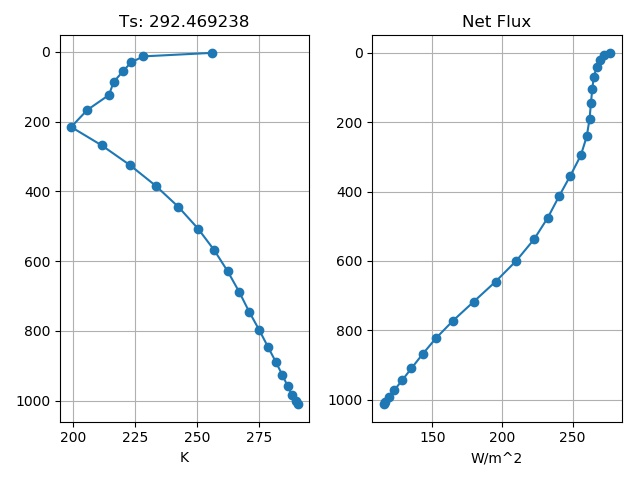

In [129]:
from IPython.display import Image
Image(filename='Norunaway_Ts_292K_0lat.jpg') #at the equator. Notice a positive net flux throghout the column

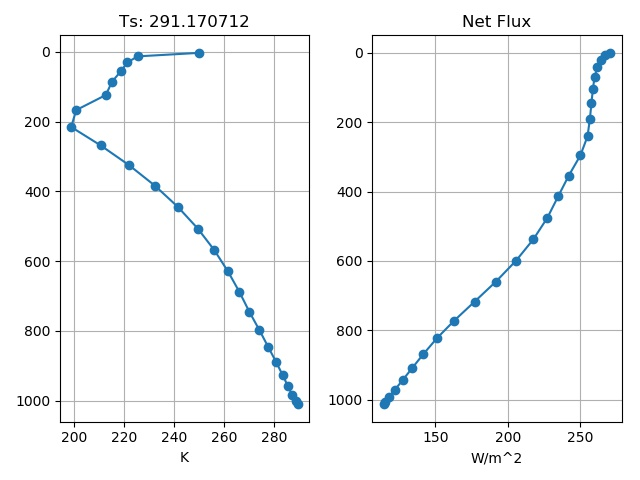

In [130]:
Image(filename='Norunaway_Ts_291K_20lat.jpg') #at 20 degree North, notice a slightly smaller surface temperature

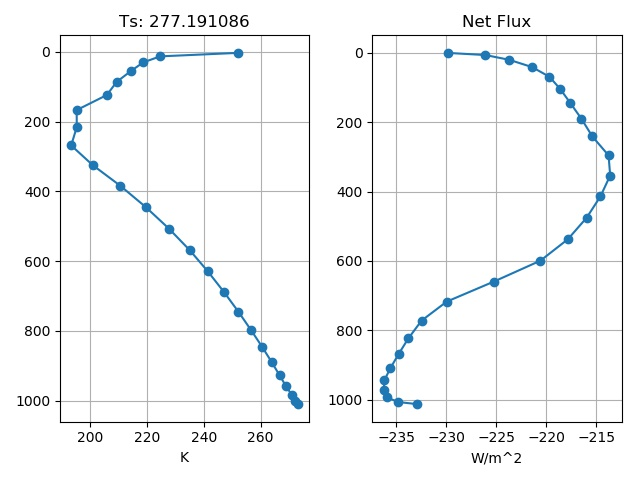

In [131]:
Image(filename='Norunaway_Ts_277K_40lat.jpg') #at 40 degree north. NOTICE A negative Net flux!

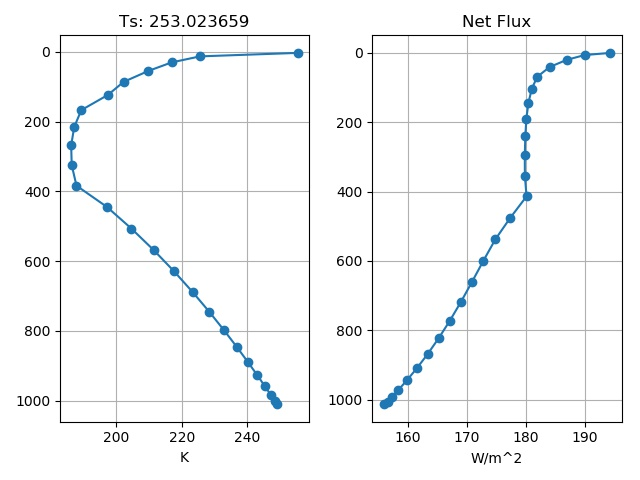

In [132]:
Image(filename='Norunaway_Ts_253K_60lat.jpg') # 60 degree North, here we have a positive Net flux again, but decreasing surface T

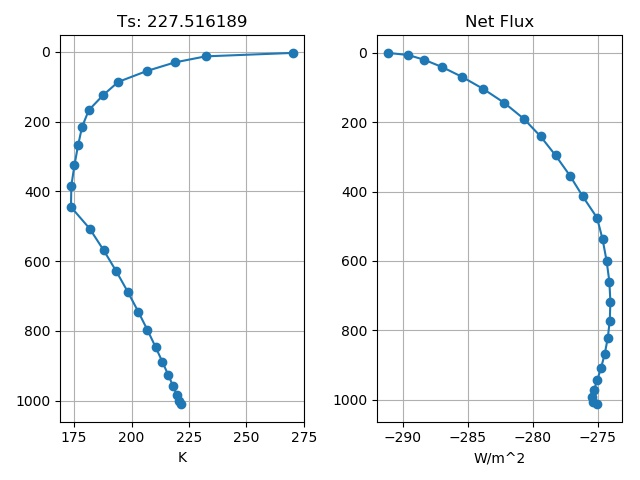

In [133]:
Image(filename='Norunaway_Ts_228K_80lat.jpg') #80 degree north, almost at the pole

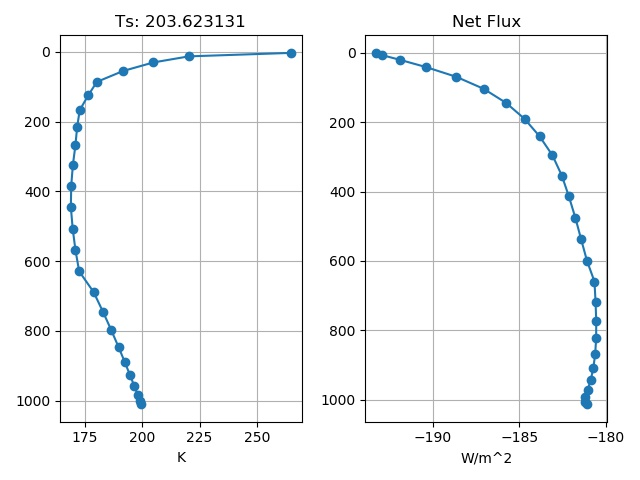

In [134]:
Image(filename='Norunaway_Ts_204K_90lat.jpg') #at the north pole